# The Smith Virus

### Sociodemographic Data

1. **PatientID** - The unique identifier of the patient
2. **Birth_Year** - Patient Year of Birth
3. **Name** - Name of the patient
4. **Region** - Patient Living Region
5. **Education** - Answer to the question: What is the highest grade or year of school you have?
6. **Disease** - The dependent variable. If the patient has the disease (Disease = 1) or not (Disease = 0)

### Health Related Data

1. **PatientID** - The unique identifier of the patient
2. **Height** - Patient's height
3. **Weight** - Patient's weight
4. **Checkup** - Answer to the question: How long has it been since you last visited a doctor for a routine Checkup? [A routine Checkup is a general physical exam, not an exam for a specific injury, illness, or condition.]
5. **Diabetes** - Answer to the question: (Ever told) you or your direct relatives have diabetes?
6. **High_Cholesterol** - Cholesterol value
7. **Blood_Pressure** - Blood Pressure in rest value
8. **Mental Health** - Answer to the question: During the past 30 days, for about how many days did poor physical or mental health keep you from doing your usual activities, such as self-care, work, or recreation?
9. **Physical Health** - Answer to the question: Thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good to the point where it was difficult to walk?

### Habits Related Data

1. **PatientID** - The unique identifier of the patient
2. **Smoking_Habit** - Answer to the question: Do you smoke more than 10 cigars daily?
3. **Drinking_Habit** - Answer to the question: What is your behavior concerning alcohol consumption?
4. **Exercise** - Answer to the question: Do you exercise (more than 30 minutes) 3 times per week or more?
5. **Fruit_Habit** - Answer to the question: How many portions of fruits do you consume per day?
6. **Water_Habit** - Answer to the question: How much water do you drink per day?

## 1. Import the needed libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.feature_selection import RFE, chi2, mutual_info_classif
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, LogisticRegression, PassiveAggressiveClassifier
import scipy.stats as stats
from scipy.stats import chi2_contingency
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA, FactorAnalysis
#from factor_analyzer import FactorAnalyzer # pip install factor_analyzer // se der erro no import
from math import ceil
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.model_selection import RandomizedSearchCV
import statistics
import statsmodels.api as smodels

#models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import PassiveAggressiveClassifier

ImportError: cannot import name '_centered' from 'scipy.signal.signaltools' (/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/signaltools.py)

## 2. Import the data

In [ ]:
# Imports
demo = pd.read_excel("the-smith-parasite-data/train_demo.xlsx")
habit = pd.read_excel("the-smith-parasite-data/train_habits.xlsx")
health = pd.read_excel("the-smith-parasite-data/train_health.xlsx")

# merge all dataframes into 1
virus = health.merge(demo).merge(habit)

#set index to patient ID 
virus.set_index('PatientID', inplace = True)

## 3. Explore the data

In [4]:
virus.head(2)

,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes,Name,Birth_Year,Region,Education,Disease,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit
PatientID,,,,,,,,,,,,,,,,,,
1167,155,67,358,120,21,2,More than 3 years,Neither I nor my immediate family have diabetes.,Mrs. Stephanie Gay,1965,London,High School Incomplete (10th to 11th grade),1,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters
1805,173,88,230,142,9,0,Not sure,Neither I nor my immediate family have diabetes.,Mr. Sherman Nero,1969,South West,High School Incomplete (10th to 11th grade),1,No,I consider myself a social drinker,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters


In [5]:
virus.shape

(800, 18)

In [6]:
virus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1167 to 1117
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Height            800 non-null    int64 
 1   Weight            800 non-null    int64 
 2   High_Cholesterol  800 non-null    int64 
 3   Blood_Pressure    800 non-null    int64 
 4   Mental_Health     800 non-null    int64 
 5   Physical_Health   800 non-null    int64 
 6   Checkup           800 non-null    object
 7   Diabetes          800 non-null    object
 8   Name              800 non-null    object
 9   Birth_Year        800 non-null    int64 
 10  Region            800 non-null    object
 11  Education         787 non-null    object
 12  Disease           800 non-null    int64 
 13  Smoking_Habit     800 non-null    object
 14  Drinking_Habit    800 non-null    object
 15  Exercise          800 non-null    object
 16  Fruit_Habit       800 non-null    object
 17  Water_Habit 

In [7]:
virus.describe()

,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Birth_Year,Disease
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,167.806250,67.82750,249.322500,131.053750,17.345000,4.558750,1966.043750,0.513750
std,7.976888,12.11347,51.566631,17.052693,5.385139,5.449189,15.421872,0.500124
min,151.000000,40.00000,130.000000,94.000000,0.000000,0.000000,1855.000000,0.000000
25%,162.000000,58.00000,213.750000,120.000000,13.000000,0.000000,1961.000000,0.000000
50%,167.000000,68.00000,244.000000,130.000000,18.000000,3.000000,1966.000000,1.000000
75%,173.000000,77.00000,280.000000,140.000000,21.000000,7.000000,1974.000000,1.000000
max,180.000000,97.00000,568.000000,200.000000,29.000000,30.000000,1993.000000,1.000000


In [8]:
virus.describe(include = ["O"])

,Checkup,Diabetes,Name,Region,Education,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit
count,800,800,800,800,787,800,800,800,800,800
unique,4,4,799,10,6,2,3,2,5,3
top,More than 3 years,Neither I nor my immediate family have diabetes.,Mr. Gary Miller,East Midlands,University Complete (3 or more years),No,I usually consume alcohol every day,No,Less than 1. I do not consume fruits every day.,Between one liter and two liters
freq,429,392,2,154,239,673,406,536,452,364


In [9]:
virus.duplicated().sum()

0

## 4. Data Preprocessing

### 4.1. Transform and Create new variables

In [10]:
#create male feature from name, delete name because its useless
virus["male"] = [1 if x[:3] == "Mr." else 0 for x in virus.Name]
virus.drop(labels = {"Name"}, inplace = True, axis = 1)

In [11]:
#turn year into age
virus["age"] = [2022 - row for row in virus.Birth_Year]
virus.drop(labels = {"Birth_Year"}, inplace = True, axis = 1)

In [12]:
virus['IMC'] = virus['Weight']/(virus['Height']/100)**2 

In [13]:
virus["is_fat"] = [1 if x>25 else 0 for x in virus.IMC] # ver vizualização bins

In [14]:
diab = []
diabF = []
for i,x in enumerate(virus.Diabetes):
    if x == 'Neither I nor my immediate family have diabetes.':
        diab.append(0)
        diabF.append(0)
    elif x=='I have/had pregnancy diabetes or borderline diabetes':
        diab.append(1)
        diabF.append(0) 
    elif x=='I do have diabetes':
        diab.append(1)
        diabF.append(0)
    else:
        diab.append(0)
        diabF.append(1)
        
virus['Diabetes_History'] = diab
virus['Diabetes_family'] = diabF
virus.drop(labels = {"Diabetes"}, inplace = True, axis = 1)

In [15]:
#Turn drink into a more readable column in analysis
drink_dict = {"I usually consume alcohol every day": "daily", 
           "I consider myself a social drinker" : "social", 
           "I do not consume any type of alcohol": "no"}

virus["Drinking_Habit"] = [drink_dict[key] for key in virus.Drinking_Habit]

### 4.2. Incoherences

In [16]:
virus['Region'].value_counts()

East Midlands               154
London                      136
South West                  107
West Midlands                89
South East                   84
East of England              80
Yorkshire and the Humber     64
North West                   59
North East                   22
LONDON                        5
Name: Region, dtype: int64

In [17]:
virus['Region'] = virus['Region'].replace('LONDON','London')

In [18]:
virus['Region'].value_counts()

East Midlands               154
London                      141
South West                  107
West Midlands                89
South East                   84
East of England              80
Yorkshire and the Humber     64
North West                   59
North East                   22
Name: Region, dtype: int64

In [19]:
virus.Fruit_Habit.value_counts()

Less than 1. I do not consume fruits every day.    452
1 to 2 pieces of fruit in average                  175
3 to 4 pieces of fruit in average                  105
5 to 6 pieces of fruit in average                   56
More than six pieces of fruit                       12
Name: Fruit_Habit, dtype: int64

### 4.3. Understanding the Data

#### 4.3.1. Cat and Num split

In [20]:
virus_num = virus.select_dtypes(include=np.number).set_index(virus.index)
virus_cat = virus.select_dtypes(exclude=np.number).set_index(virus.index)

virus_cat[["is_fat", "Diabetes_History", "male", "Disease", "Diabetes_family"]] = virus_num[["is_fat", "Diabetes_History", "male", "Disease", "Diabetes_family"]]
virus_num.drop(labels = ["is_fat", "Diabetes_History", "male", "Disease", "Diabetes_family"], axis = 1, inplace = True)

#### Target Mean Vizualizations

<AxesSubplot:xlabel='age', ylabel='Mental_Health'>

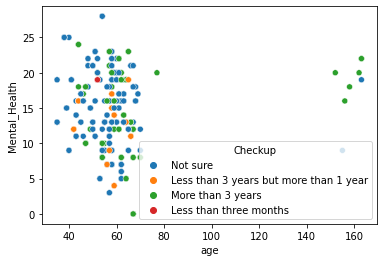

In [21]:
sns.scatterplot(data = virus.loc[virus["Disease"] == 0], x = "age", y = "Mental_Health", hue = "Checkup")

<AxesSubplot:xlabel='age', ylabel='Mental_Health'>

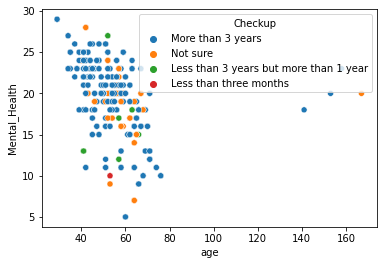

In [22]:
sns.scatterplot(data = virus.loc[virus["Disease"] == 1], x = "age", y = "Mental_Health", hue = "Checkup")

<AxesSubplot:xlabel='count', ylabel='Checkup'>

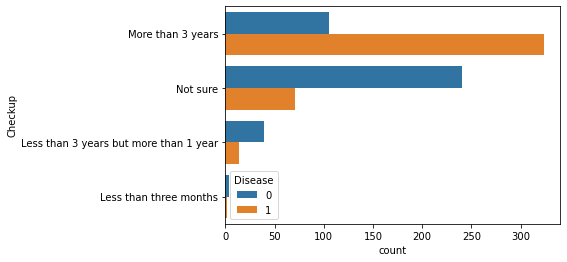

In [23]:
sns.countplot(data = virus, y="Checkup", hue = "Disease")

`In these next visualizations, we get the target means of every numerical variable's value and its count and plot then in bar charts, to understand each of the value's prediction power on its own`

In [24]:
num_disease_means = {} #dictionary with all the target means per variable

for i in virus_num:
    num_disease_means[i] = (
                            pd.DataFrame([virus.groupby(i).mean()["Disease"], 
                              virus.groupby(i).count()["Disease"].rename("count")]).T
                            )

In [25]:
def display_means(var, n):  #n = display n biggest by count
    data = num_disease_means[var].sort_values(by = "count", ascending = False).head(n)
    data = data.reset_index().sort_values(by = var).set_index(var)
    
    sns.set()
    fig = plt.figure(figsize=(15,7), dpi = 300) # Create matplotlib figure

    ax = fig.add_subplot() # Create matplotlib axes
    ax2 = ax.twinx() # Create another axes that shares the same x-axis as a
    width = .3

    data["Disease"].plot(kind='bar',color='grey',ax=ax,width=width, position=1)
    data["count"].plot(kind='bar',color='navy', ax=ax2 ,width = width,position=0)

    ax.grid(None, axis="x")
    ax2.grid(None)

    ax.set_ylabel('Disease mean (%)')
    ax2.set_ylabel('count')

def bins(var, n):
    aux = num_disease_means[var].copy()

    aux.reset_index(inplace = True)

    aux[var+"_Bins"] = pd.qcut(aux[var], n )
    
    plt.figure(figsize=(17,9))

    sns.barplot(data = aux, x = var+"_Bins", y = "Disease", palette="coolwarm")



In [26]:
print("Target mean averages and std per feature\n", "-"*39)

for df in num_disease_means.values():
    print(df.index.name,"\n", "mean",round(np.mean(df["Disease"]*100) ,2), ""*3, 
                         "var",round(np.std(df["Disease"])*100,2))


Target mean averages and std per feature
 ---------------------------------------
Height 
 mean 55.55  var 15.49
Weight 
 mean 52.76  var 22.3
High_Cholesterol 
 mean 50.63  var 42.07
Blood_Pressure 
 mean 48.72  var 35.29
Mental_Health 
 mean 44.5  var 32.35
Physical_Health 
 mean 26.38  var 26.53
age 
 mean 54.41  var 30.65
IMC 
 mean 51.07  var 43.22


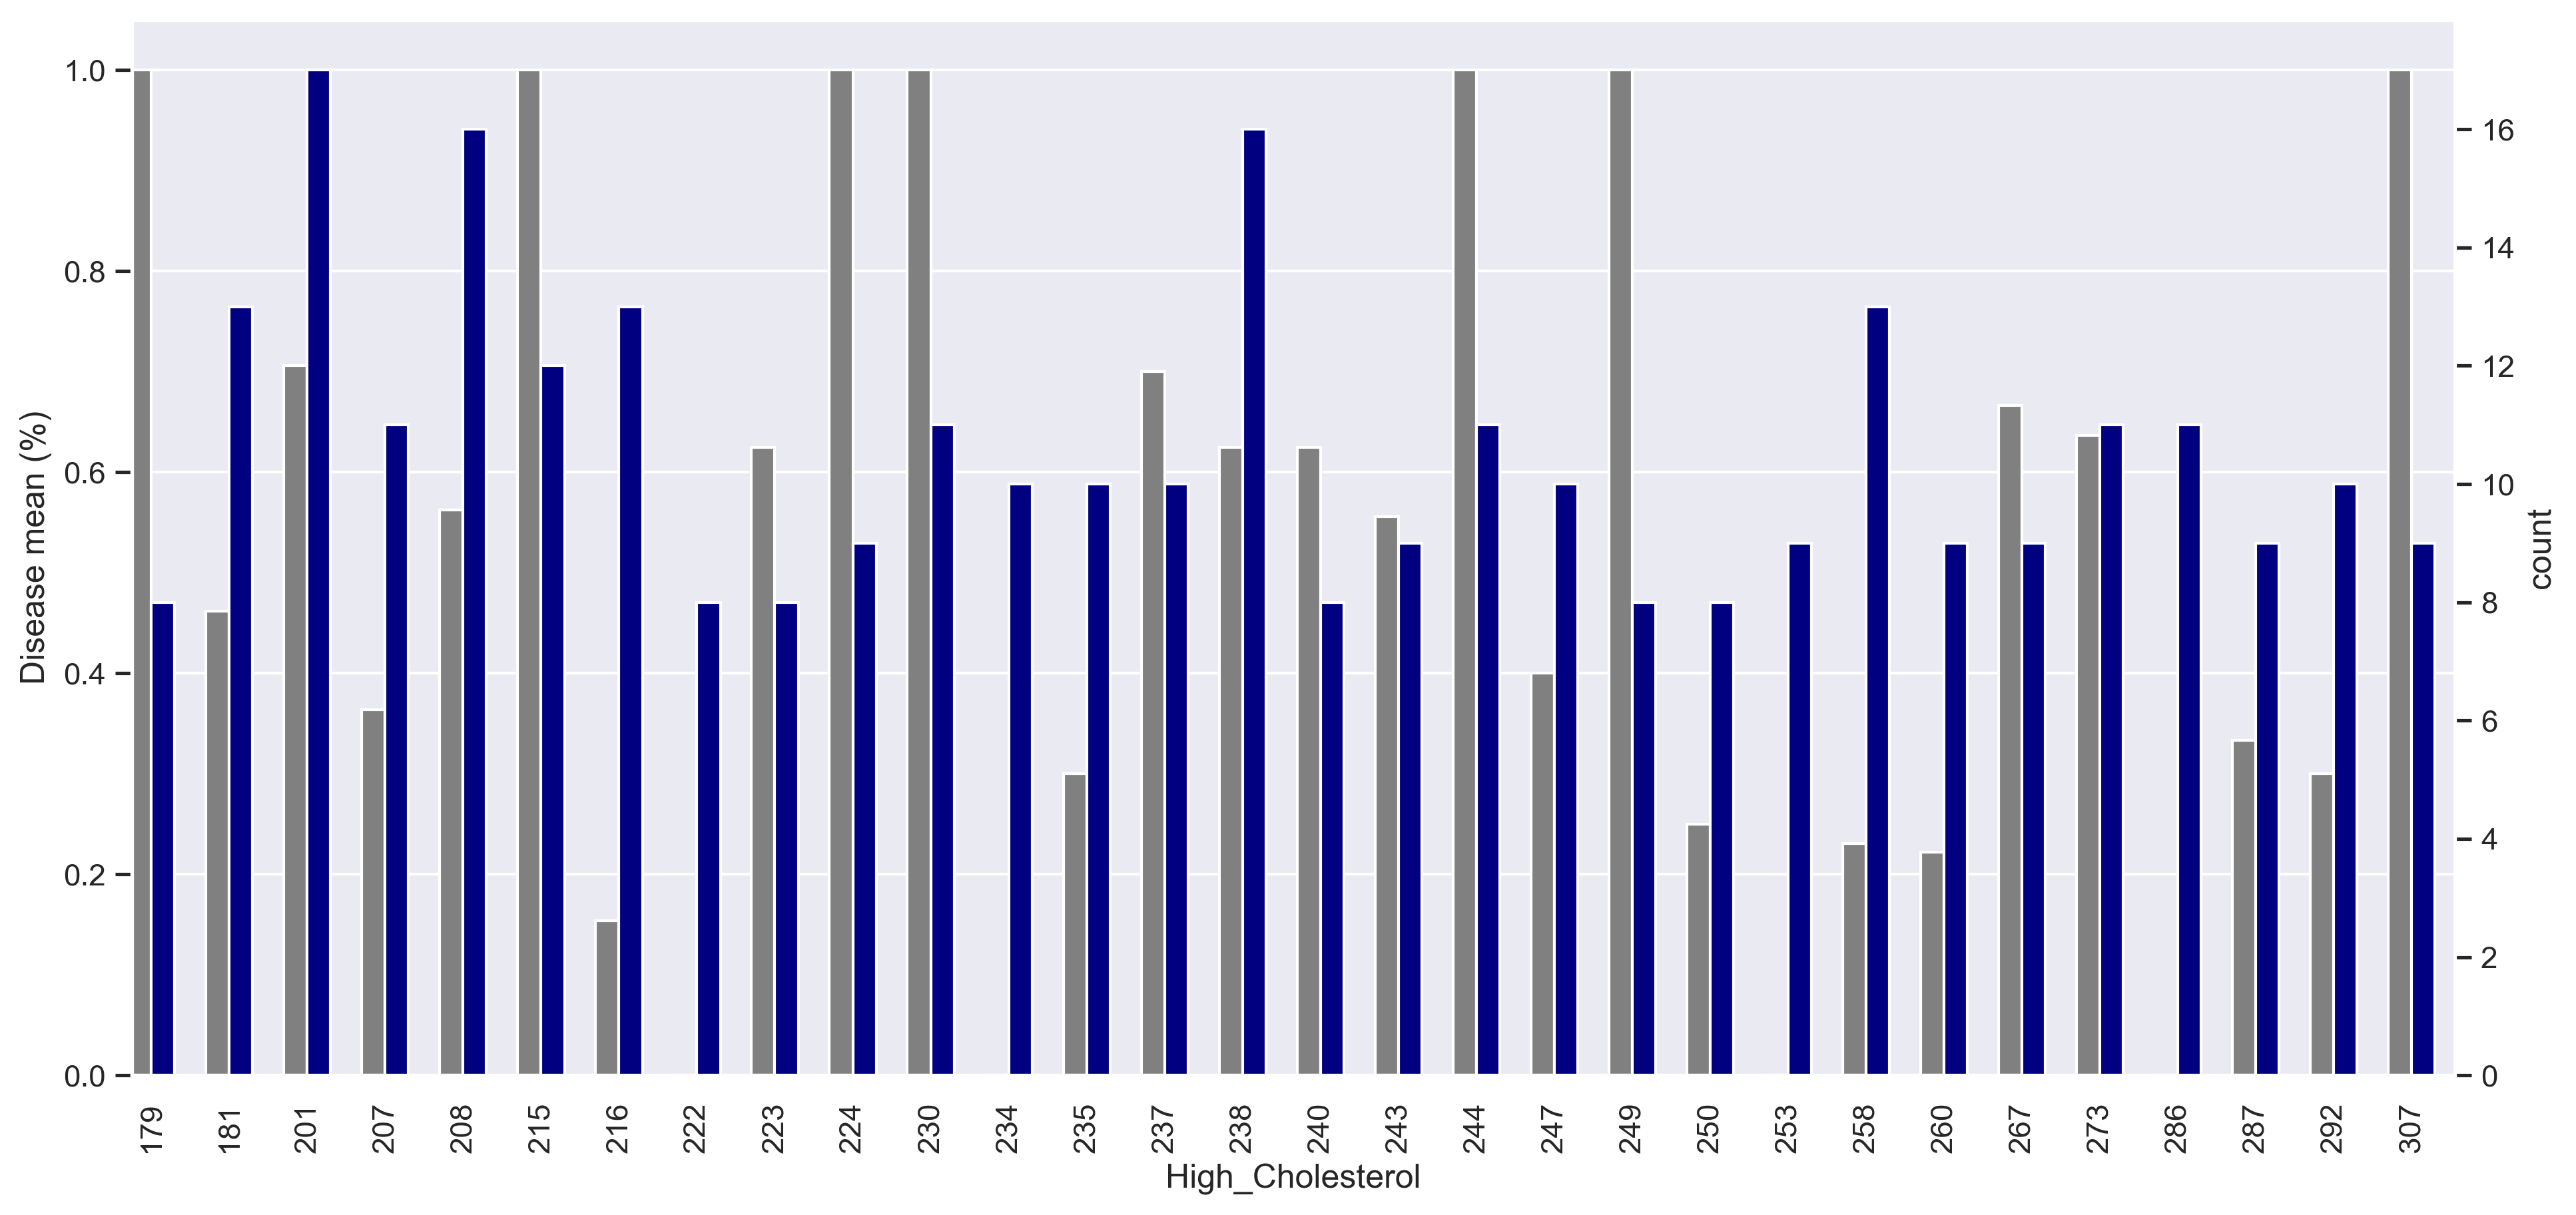

In [27]:
#var é a variável que queremos observar e n é a quantidade das linhas com maior contagem que queremos observar
display_means(var = "High_Cholesterol", n = 30)

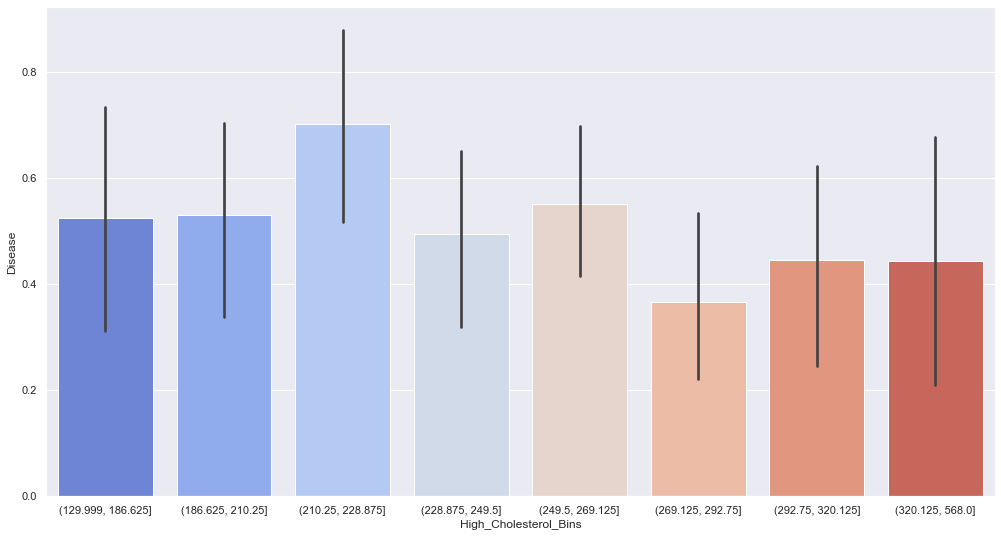

In [28]:
#var é o a variável que queremos observar no plot e n é o numero de bins em que vamos agrupar os dados
bins(var = "High_Cholesterol", n = 8) # fazer com contage

In [29]:
# for i in virus_num:
#     plt.figure(figsize=(10,7))
#     sns.histplot(virus_num, x = i, multiple = "stack", hue = "Disease")

#### Boxplots and Histograms

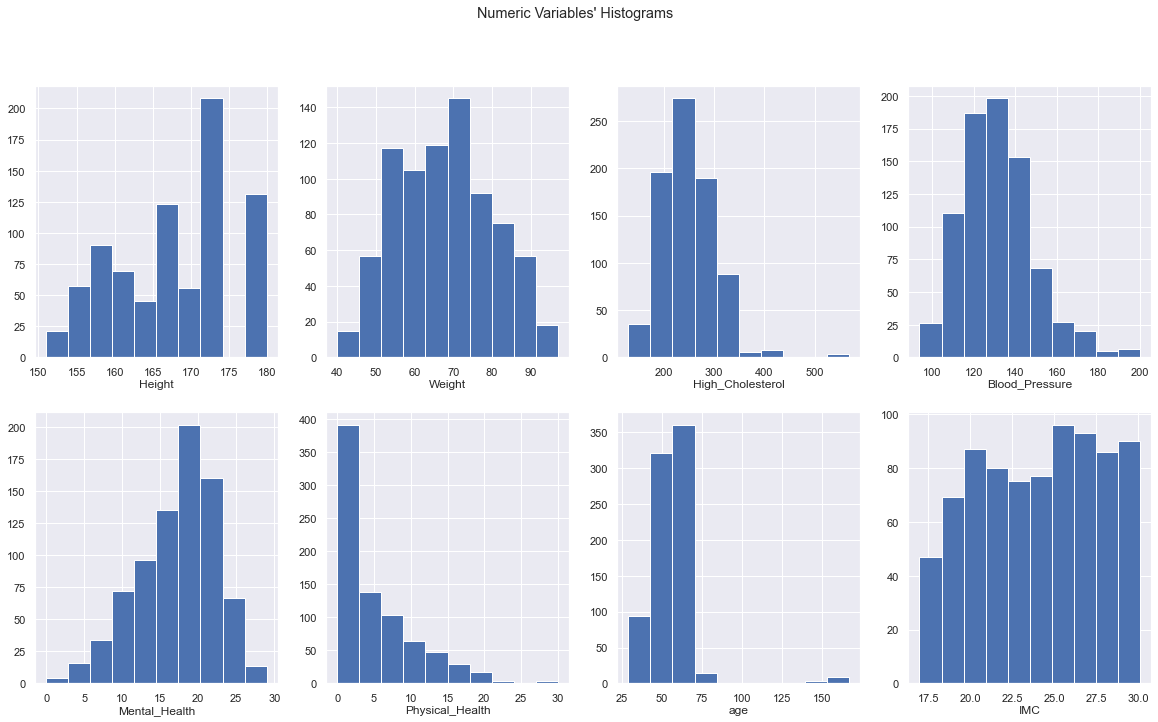

In [30]:
# All Numeric Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(virus_num.columns) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), virus[virus_num.columns]): # Notice the zip() function and flatten() method
    ax.hist(virus[feat])
    ax.set_title(feat, y=-0.13)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)

plt.show()

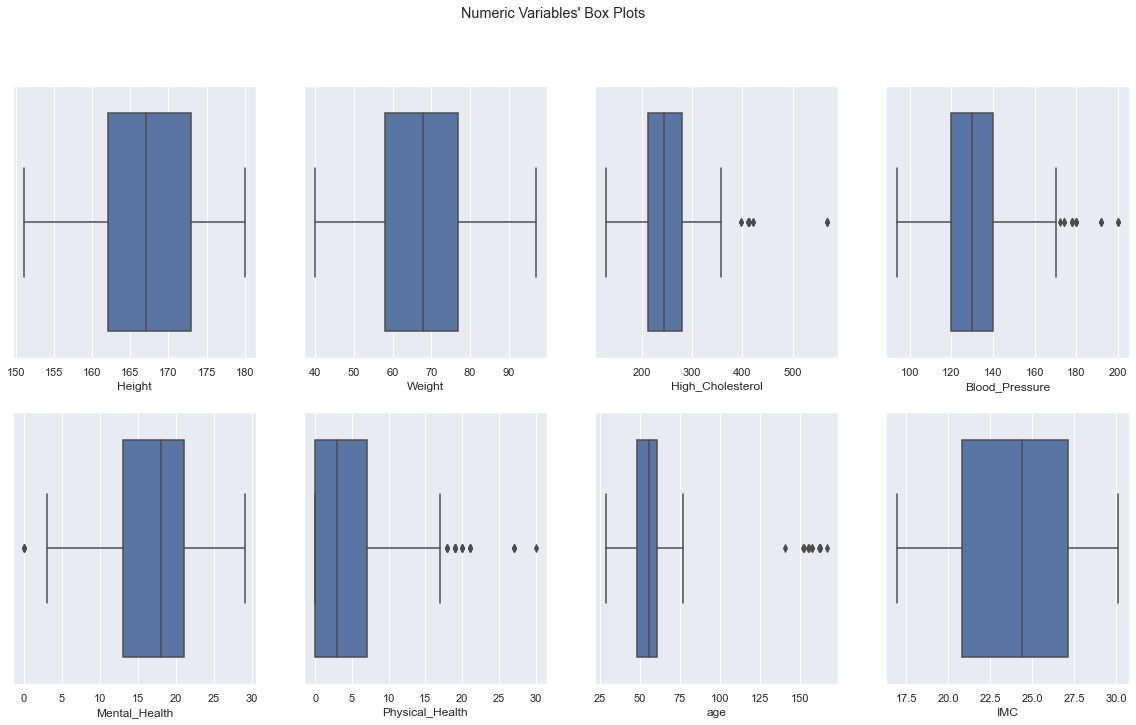

In [31]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(virus_num.columns) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), virus[virus_num.columns]): # Notice the zip() function and flatten() method
    sns.boxplot(x=virus[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()

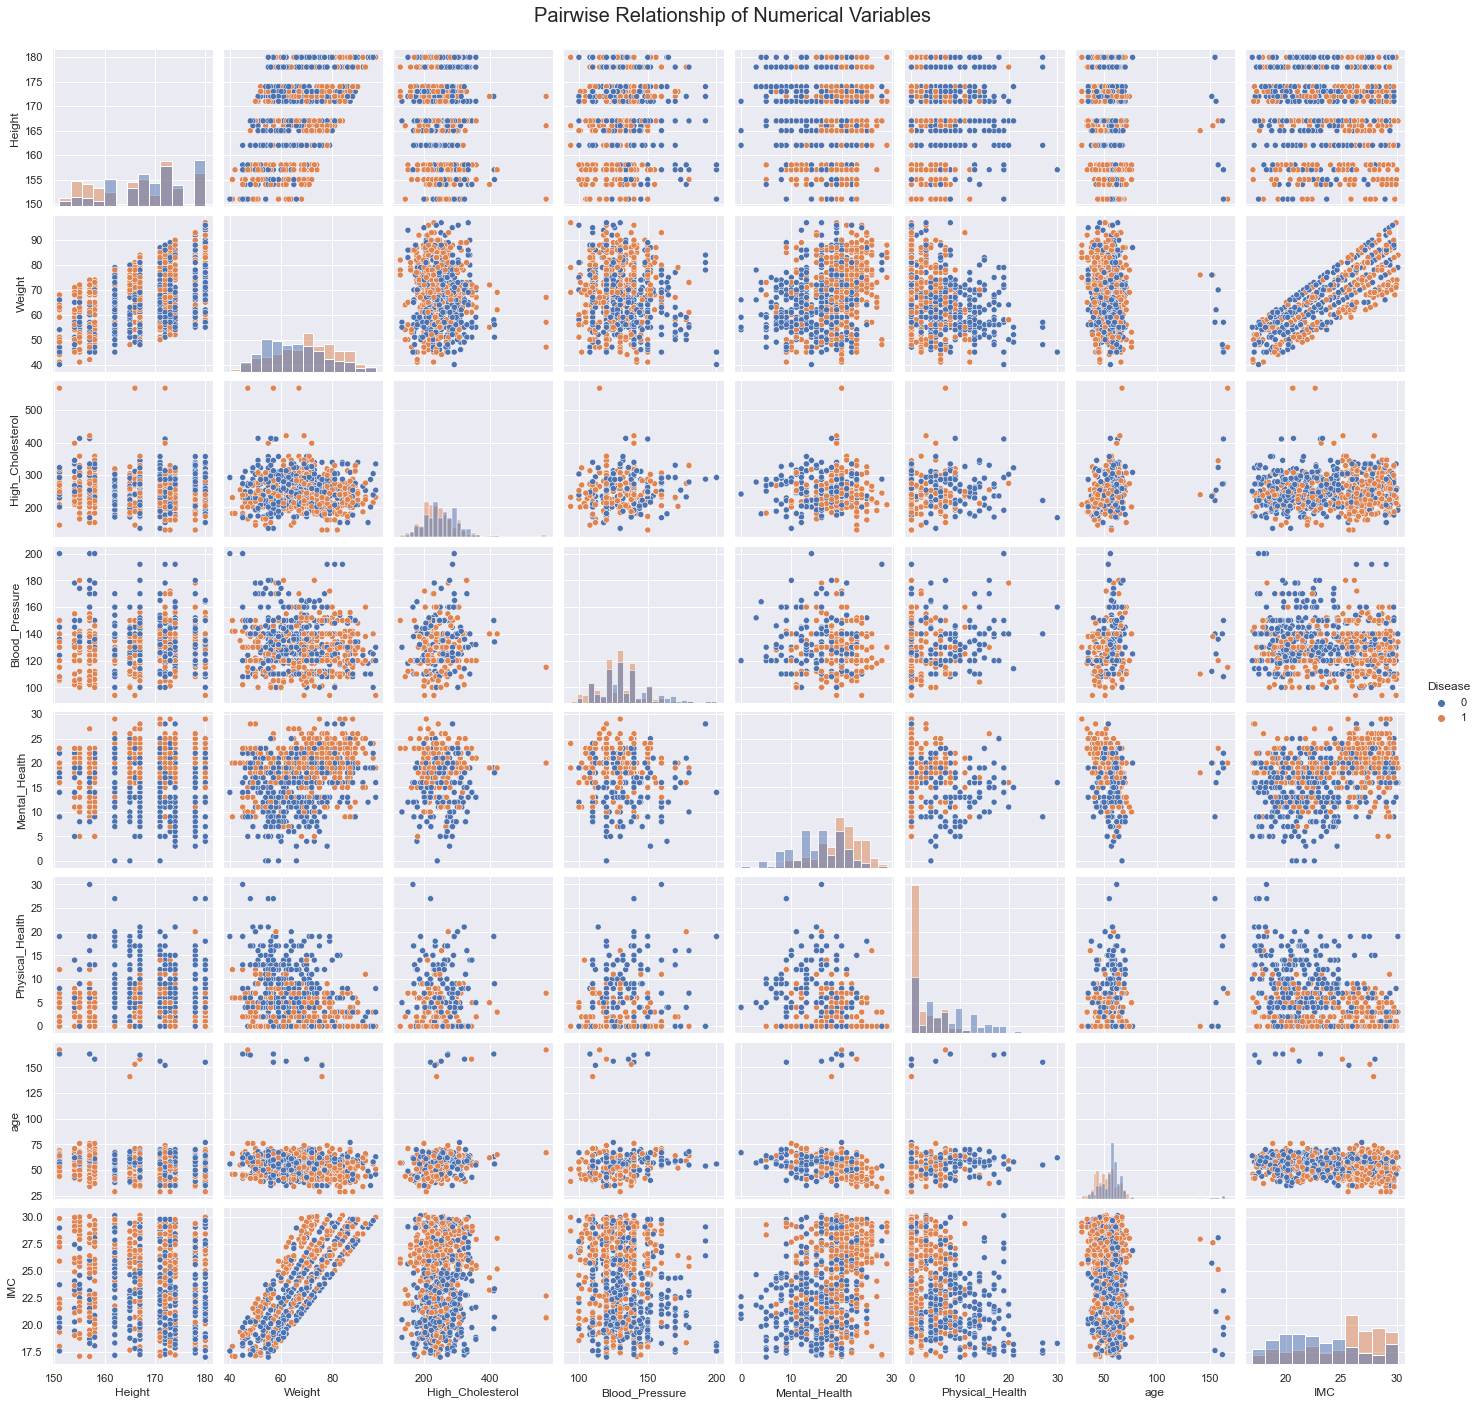

In [32]:
# Pairwise Relationship of Numerical Variables
sns.set()

# Setting pairplot
sns.pairplot(data = virus[list(virus_num.columns)+["Disease"]], hue = "Disease", diag_kind="hist")

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)

plt.show()

In [13]:
def norm(x):
    return x/5

lst = [1,1,5,2,4,4]
Sd = [1 - norm(x) for x in lst]

In [12]:
Sd

[0.8, 0.8, 0.0, 0.6, 0.19999999999999996, 0.19999999999999996]

In [14]:
9/1.6, 4/1.6, 16/1.6, 4/0.4

(5.625, 2.5, 10.0, 10.0)

### 4.4. Outliers

<AxesSubplot:xlabel='High_Cholesterol'>

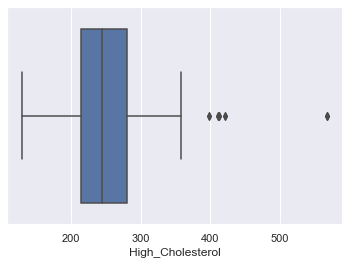

In [33]:
#sns.boxplot(data = virus, x= "age")
sns.boxplot(data = virus, x= "High_Cholesterol")

In [34]:
virus[virus['age']>=120].age

PatientID
1591    163
1481    163
1288    158
1139    141
1158    167
1593    163
1055    155
1836    153
1803    152
1072    156
1390    158
1088    162
Name: age, dtype: int64

In [35]:
# fill with mode
#virus['Education'].fillna(statistics.mode(virus['Education']), inplace = True)

Turn outliers into nan values

In [36]:
#These are the values that we deemed as outliers
virus.age[virus.age >= 120] = np.nan
virus.High_Cholesterol[virus.High_Cholesterol >= 500] = np.nan

<AxesSubplot:xlabel='age'>

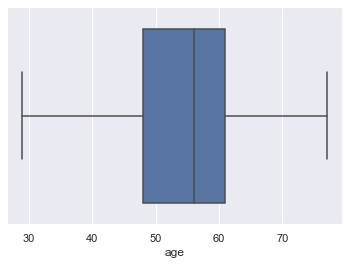

In [37]:
sns.boxplot(x = 'age', data = virus)

### 4.5. Missing values

In [38]:
virus.isna().sum()

Height               0
Weight               0
High_Cholesterol     3
Blood_Pressure       0
Mental_Health        0
Physical_Health      0
Checkup              0
Region               0
Education           13
Disease              0
Smoking_Habit        0
Drinking_Habit       0
Exercise             0
Fruit_Habit          0
Water_Habit          0
male                 0
age                 12
IMC                  0
is_fat               0
Diabetes_History     0
Diabetes_family      0
dtype: int64

Perform KNN Imputer on nan values

In [39]:
#Encoding ordinal de Education
#passar  tipo a string
virus['Education'] = virus['Education'].astype(str)

#passar todas as categorias a numéricas, para que esta coluna esteja numa escala ordinal
le = LabelEncoder()
virus_aux = pd.DataFrame(le.fit_transform(virus['Education']), index=virus.index)

#substituir o valor atribuido aos missing values por nan, q neste caso é o 6 por causa da ordem no array
virus_aux.replace([6],np.nan,inplace=True)

#create an instance of KNN Imputer
#num_vars = ['Years of Education','Role','Working Hours per week','Money Received','Ticket Price','Age', 'Male', 'Higher Education Level', 'Group A', 'Group B', 'Group C', 'Children']
virus['Education'] = virus_aux

virus_num_aux = virus.select_dtypes(include=np.number).set_index(virus.index)

#fit an instance of KNN Imputer to df dataframe
imputer = KNNImputer(n_neighbors=1).fit(virus_num_aux)

#fill in the mv in df with the values fitted by the imputer
filled_data = imputer.transform(virus_num_aux)

#criar um novo dataset cujo data corresponde ao filled_data e as colunas correspondem as colunas do df
df_2 = pd.DataFrame(filled_data, columns = virus_num_aux.columns, index = virus_num_aux.index)
df_2.head()

#passar o Role a variável int para usar o método inverse_transform (Transform numerical labels back to multi-class labels - obter as categorias originais atribuidas aos valores no Role)
df_2['Education'] = df_2['Education'].astype(int)
df_2['Education'] = le.inverse_transform(df_2['Education'])
#data.drop('Role',axis=1,inplace=True)

virus[["Education", "age", "High_Cholesterol"]] = df_2[["Education", "age", "High_Cholesterol"]]

In [40]:
virus.isna().sum()

Height              0
Weight              0
High_Cholesterol    0
Blood_Pressure      0
Mental_Health       0
Physical_Health     0
Checkup             0
Region              0
Education           0
Disease             0
Smoking_Habit       0
Drinking_Habit      0
Exercise            0
Fruit_Habit         0
Water_Habit         0
male                0
age                 0
IMC                 0
is_fat              0
Diabetes_History    0
Diabetes_family     0
dtype: int64

### 4.6. Category Aggregation

In [41]:
virus['Checkup'].value_counts()

More than 3 years                         429
Not sure                                  312
Less than 3 years but more than 1 year     53
Less than three months                      6
Name: Checkup, dtype: int64

In [42]:
virus["Checkup"]= virus['Checkup'].replace(['Less than 3 years but more than 1 year','Less than three months'],'Less than 3 years')

In [43]:
virus['Checkup'].value_counts()

More than 3 years    429
Not sure             312
Less than 3 years     59
Name: Checkup, dtype: int64

In [44]:
virus['Water_Habit'].value_counts()

Between one liter and two liters                  364
More than half a liter but less than one liter    352
Less than half a liter                             84
Name: Water_Habit, dtype: int64

In [45]:
virus["Water_Habit"]= virus['Water_Habit'].replace('Between one liter and two liters','More than a liter')
virus["Water_Habit"]= virus['Water_Habit'].replace(['More than half a liter but less than one liter','Less than half a liter'],'Less than a liter')

In [46]:
virus['Water_Habit'].value_counts()

Less than a liter    436
More than a liter    364
Name: Water_Habit, dtype: int64

In [47]:
virus['Drinking_Habit'].value_counts()

daily     406
social    383
no         11
Name: Drinking_Habit, dtype: int64

In [48]:
virus["Drinking_Habit"]= virus['Drinking_Habit'].replace(['social','no'],'I do not consume alcohol')

In [49]:
virus['Drinking_Habit'].value_counts()

daily                       406
I do not consume alcohol    394
Name: Drinking_Habit, dtype: int64

In [50]:
categ = ['Checkup', 'Region', 'Education', 'Disease','Smoking_Habit', 'Drinking_Habit', "Exercise", "Fruit_Habit", "Water_Habit", "male", "is_fat", "Diabetes_History", "Diabetes_family"]

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


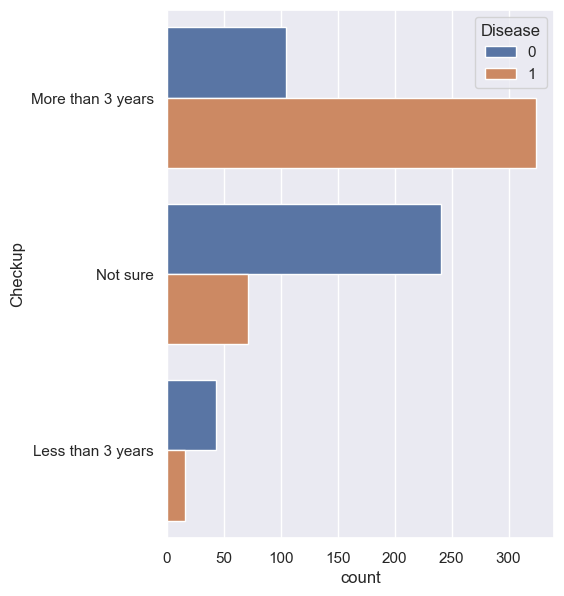

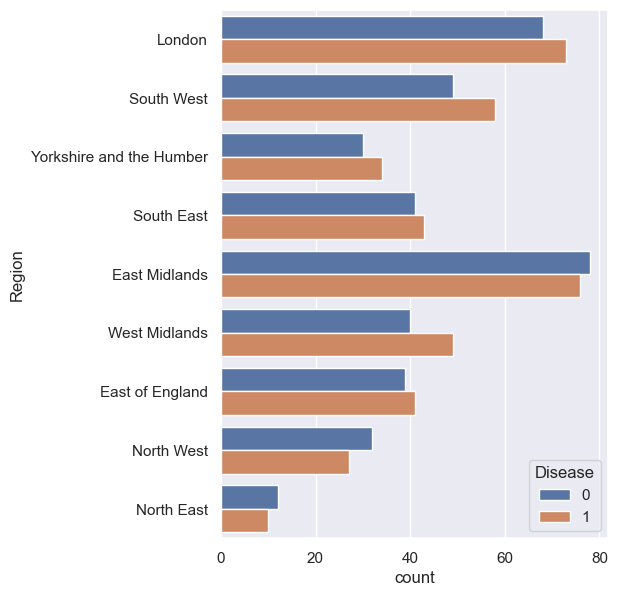

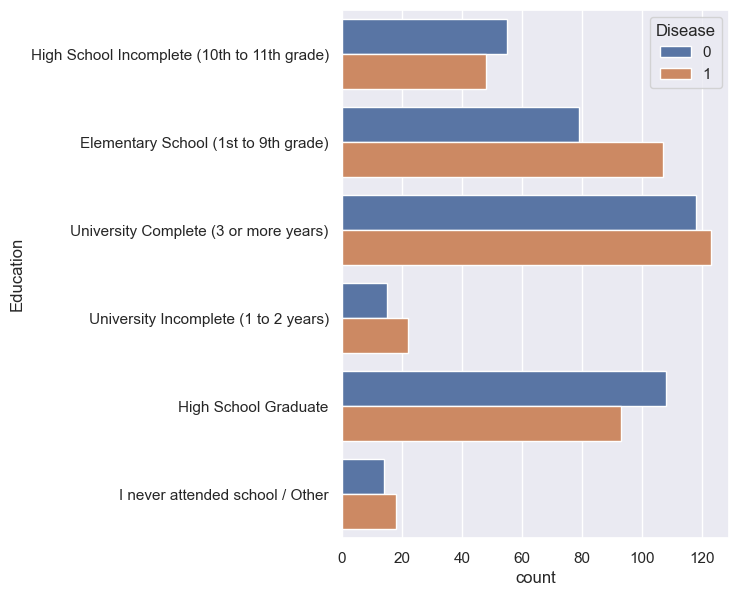

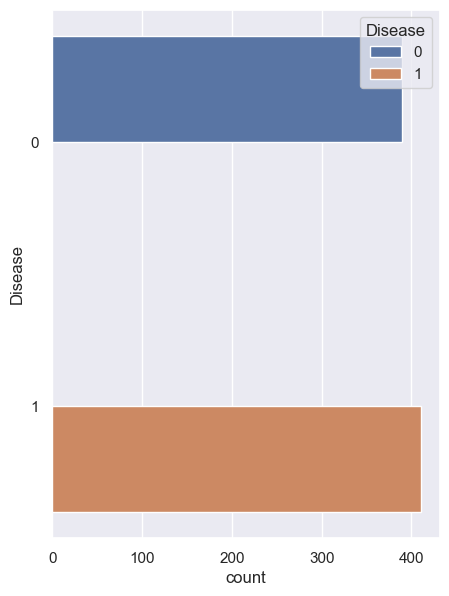

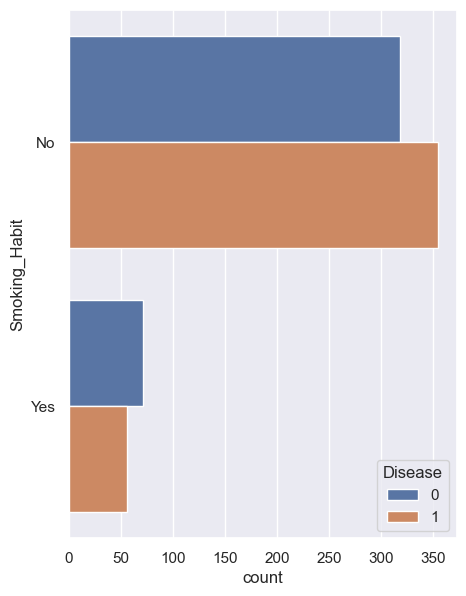

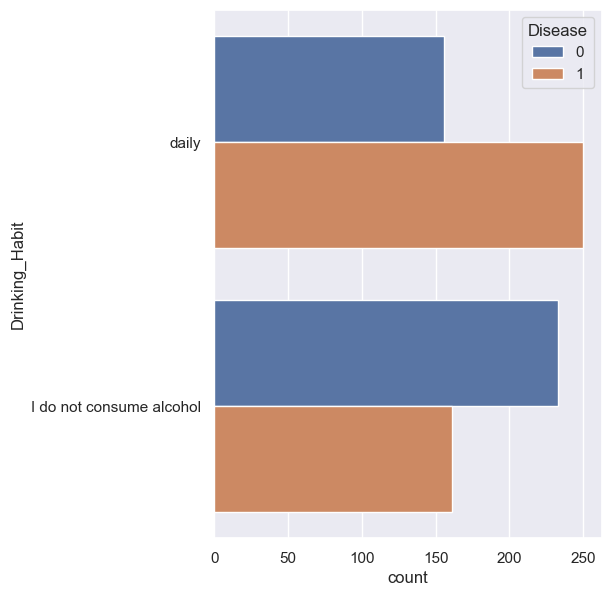

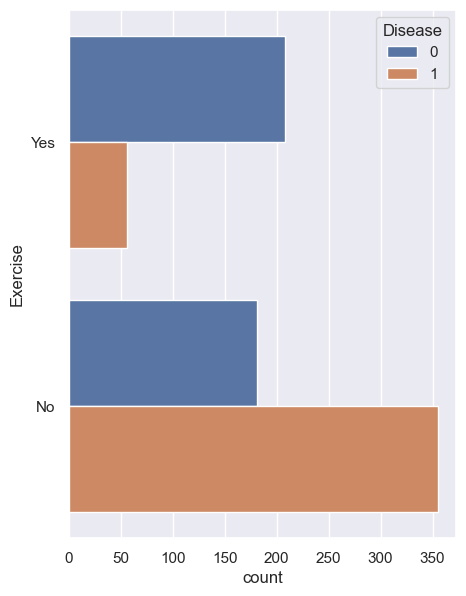

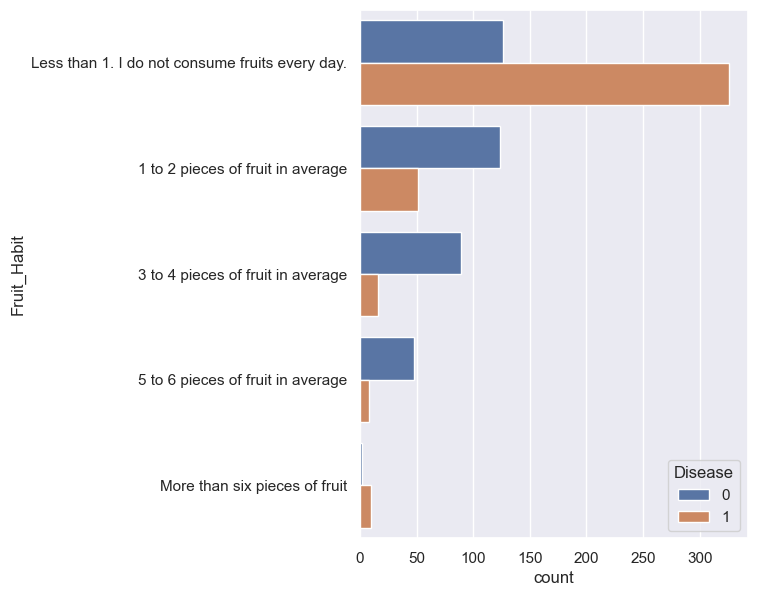

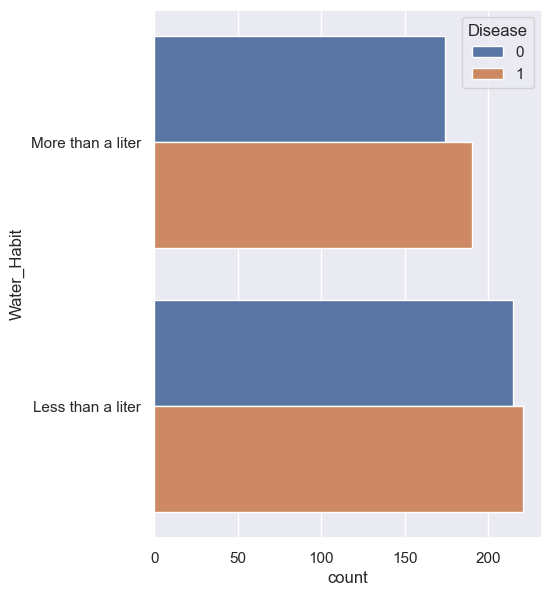

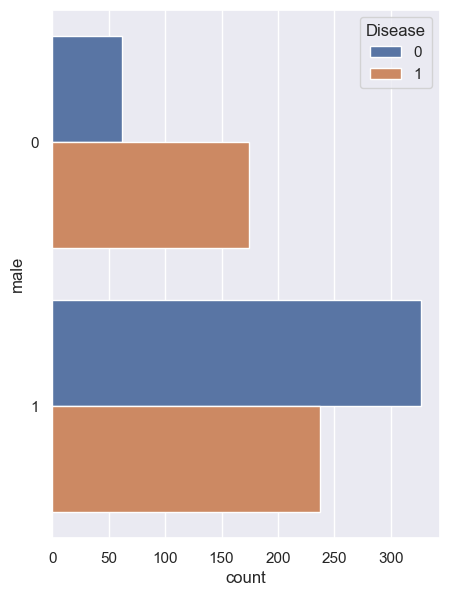

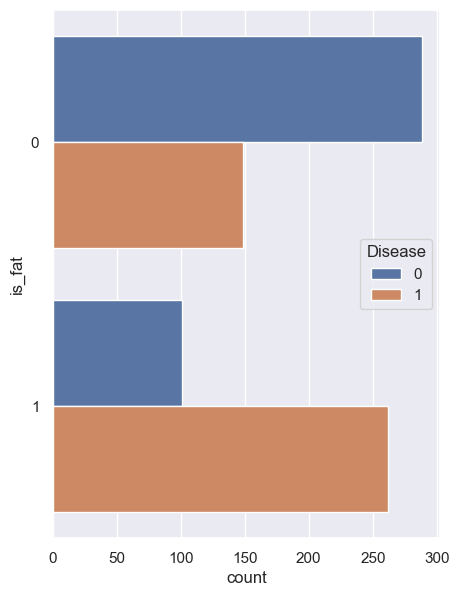

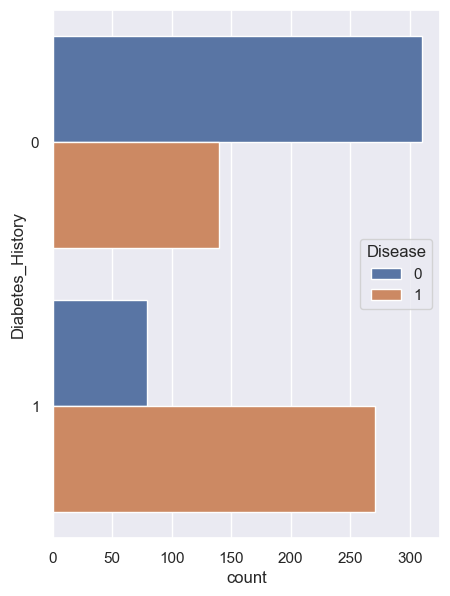

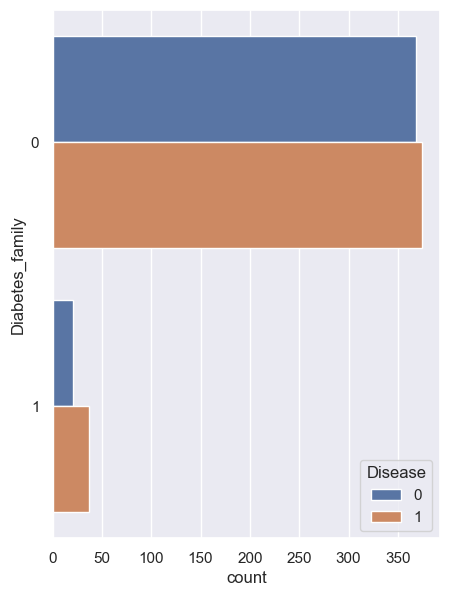

In [51]:
# Vizualization of Categorical variable's barplots with binary discrimination

for var in categ:
    plt.figure(figsize = (5,7), dpi = 100)
    print(sns.countplot(data = virus, y = var, hue = "Disease", orient = "v"))

### 4.7. Categorical to Numerical 

#### 4.7.1. Create Dummy Variables

In [52]:
# turn smoking and exercise into a dummy variable
dummies = virus[["Smoking_Habit", "Exercise", "Water_Habit", "Checkup", "Drinking_Habit"]]
dummies = pd.get_dummies(dummies, drop_first = True)
virus[dummies.columns] = dummies
virus.drop(labels = {"Smoking_Habit", "Exercise", "Water_Habit", "Checkup", "Drinking_Habit"}, inplace = True, axis = 1)

In [53]:
virus.rename(columns = {"Water_Habit_More than a liter": "Water_Habit_more_than_liter", "Checkup_More than 3 years": "Checkup_more_than_3_years", "Checkup_Not sure": "Checkup_not_sure"}, inplace=True)

#### 4.7.2. Frequency Encoding

In [54]:
#Region Frequency
#enc_Region_1 = (virus.groupby('Region').size()) / len(virus)
#enc_Region_1
#virus['Region_encode'] = virus['Region'].apply(lambda x : enc_Region_1[x])
#virus.drop(labels = {'Region'}, inplace = True, axis = 1)

In [55]:
#Education Frequency 
#como lidar com os missing values
#enc_Education_1 = (virus.groupby('Education').size()) / len(virus)
#enc_Education_1
#virus['Education_encode'] = virus['Education'].apply(lambda x : enc_Education_1[x])
#virus.drop(labels = {'Education'}, inplace = True, axis = 1)

In [56]:
#Fruit Frequency
#enc_Fruit_1 = (virus.groupby('Fruit_Habit').size()) / len(virus)
#enc_Fruit_1
#virus['Fruit_encode'] = virus['Fruit_Habit'].apply(lambda x : enc_Fruit_1[x])
#virus.drop(labels = {'Fruit_Habit'}, inplace = True, axis = 1)

#### 4.7.3. Target Mean Encoding

In [57]:
#test_aux = virus.copy()
#virus_cat = virus.select_dtypes(exclude = np.number).set_index(virus.index)
#virus_cat.describe(include = ["O"])

#for col in virus_cat.columns:
#    ordercont = virus.groupby(col)['Disease'].mean().to_dict()
#    virus_cat[col] = virus_cat[col].map(ordercont)

In [58]:
#virus[["Region", "Education", "Fruit_Habit"]] = virus_cat

#### Dummy Encoding

In [59]:
virus = pd.get_dummies(virus, drop_first = True)

## 5. Data Partition

In [60]:
virus_backup = virus.copy()

In [61]:
x = virus.drop('Disease', axis = 1)
y = virus['Disease']

In [62]:
x_train, x_val, y_train, y_val = train_test_split(x,y, test_size = 0.3, random_state = 0, stratify = y, shuffle = True)

In [63]:
num_vars = ['Height', 'Weight', 'High_Cholesterol','Blood_Pressure','Mental_Health', 'Physical_Health', 'age', 'IMC']

x_train_num = x_train[num_vars]
x_train_cat = x_train.drop(num_vars, axis = 1)

x_val_num = x_val[num_vars]
x_val_cat = x_val.drop(num_vars, axis = 1)

## 6. Data Standardization

Here, we can choose between 3 different methods of standardization, `MinMaxScaler()`,`RobustScaler()` and `StandardScaler()` scaling. We created a function that applies the desired method to a specific dataset

In [64]:
num_vars = ['Height', 'Weight', 'High_Cholesterol','Blood_Pressure','Mental_Health', 'Physical_Health', 'age', 'IMC']

In [65]:
def standardize(data, method):
    data = data[num_vars]
    scaler = method.fit(data)
    out = scaler.transform(data)
    out = pd.DataFrame(out, columns = data.columns).set_index(data.index)
    return out

In [66]:
virus_temp = standardize(virus, method = StandardScaler())
virus[num_vars] = virus_temp

In [67]:
x_train_num = standardize(x_train, method = StandardScaler())
x_val_num = standardize(x_val, method = StandardScaler())
x_train[num_vars] = x_train_num
x_val[num_vars] = x_val_num

## 7. Feature Selection

### Filter Methods

### 7.1. Univariate Variables

In [68]:
x_train_num.var()

Height              1.001789
Weight              1.001789
High_Cholesterol    1.001789
Blood_Pressure      1.001789
Mental_Health       1.001789
Physical_Health     1.001789
age                 1.001789
IMC                 1.001789
dtype: float64

### 7.2. Spearman Correlation

In [69]:
def cor_heatmap(cor):
    plt.figure(figsize=(60,40))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()

In [70]:
cor_spearman = x_train.join(y_train).corr(method ='spearman')

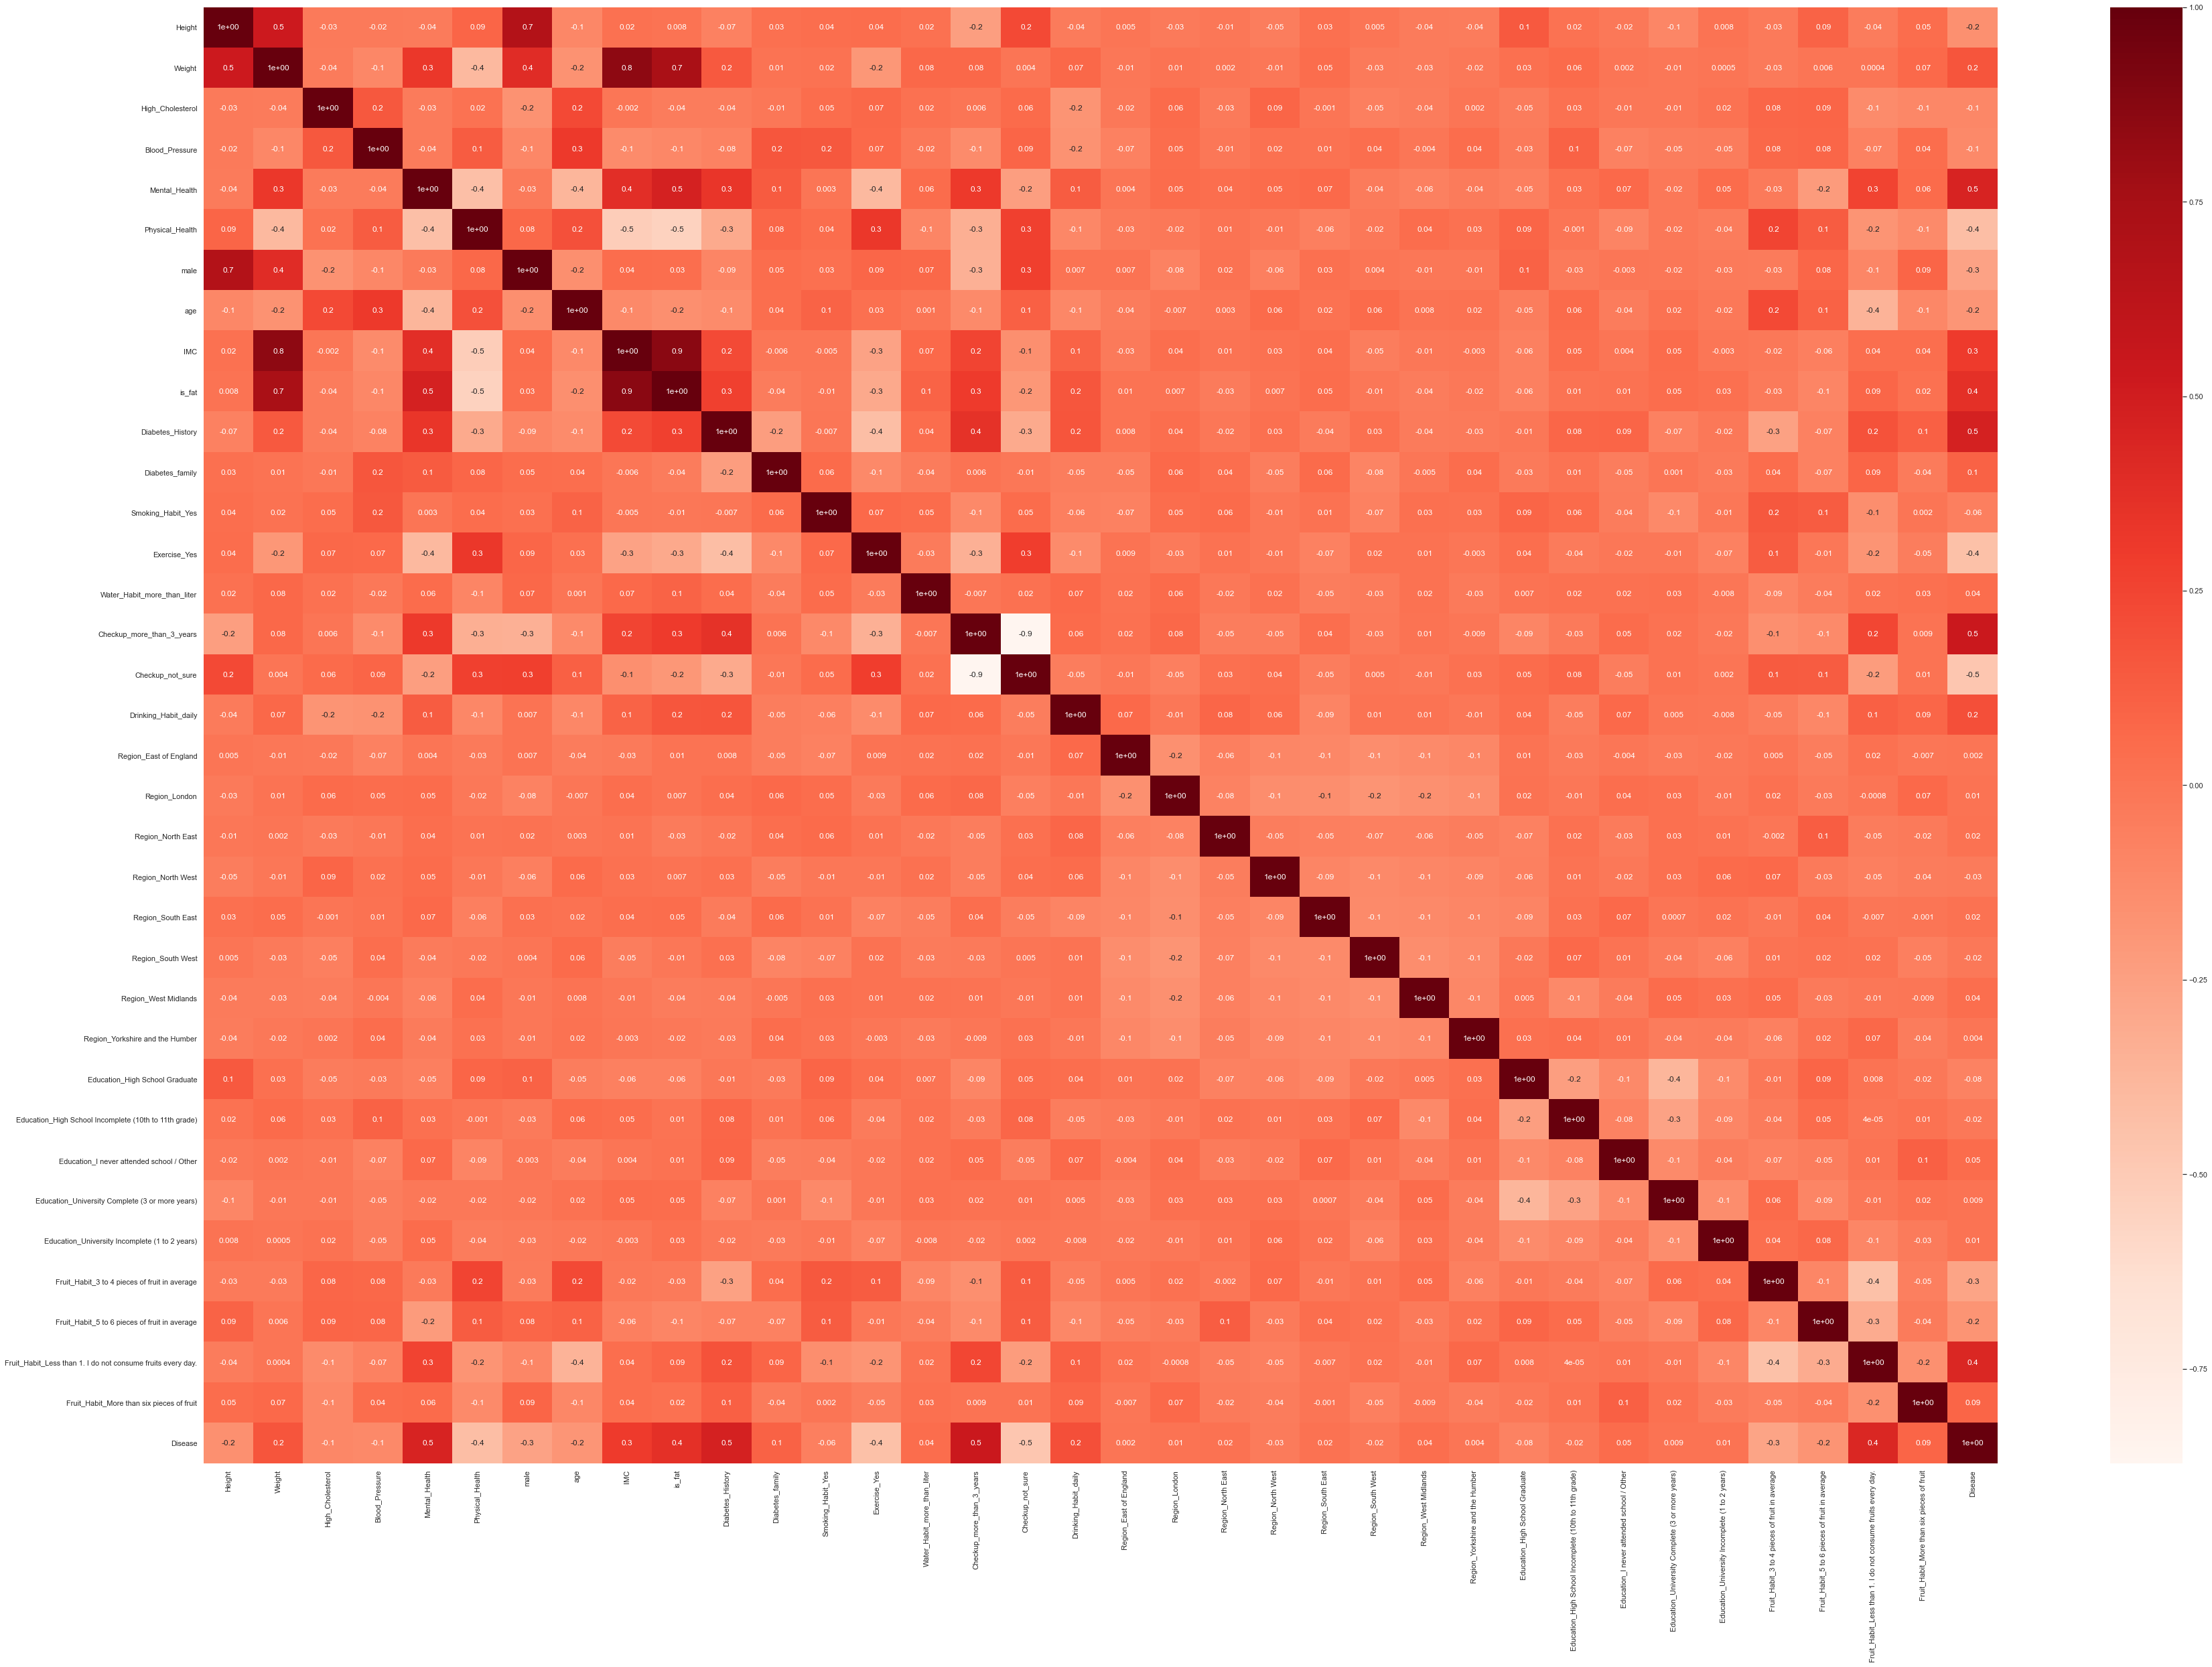

In [71]:
cor_heatmap(cor_spearman)

### 7.3. Pearson Correlation

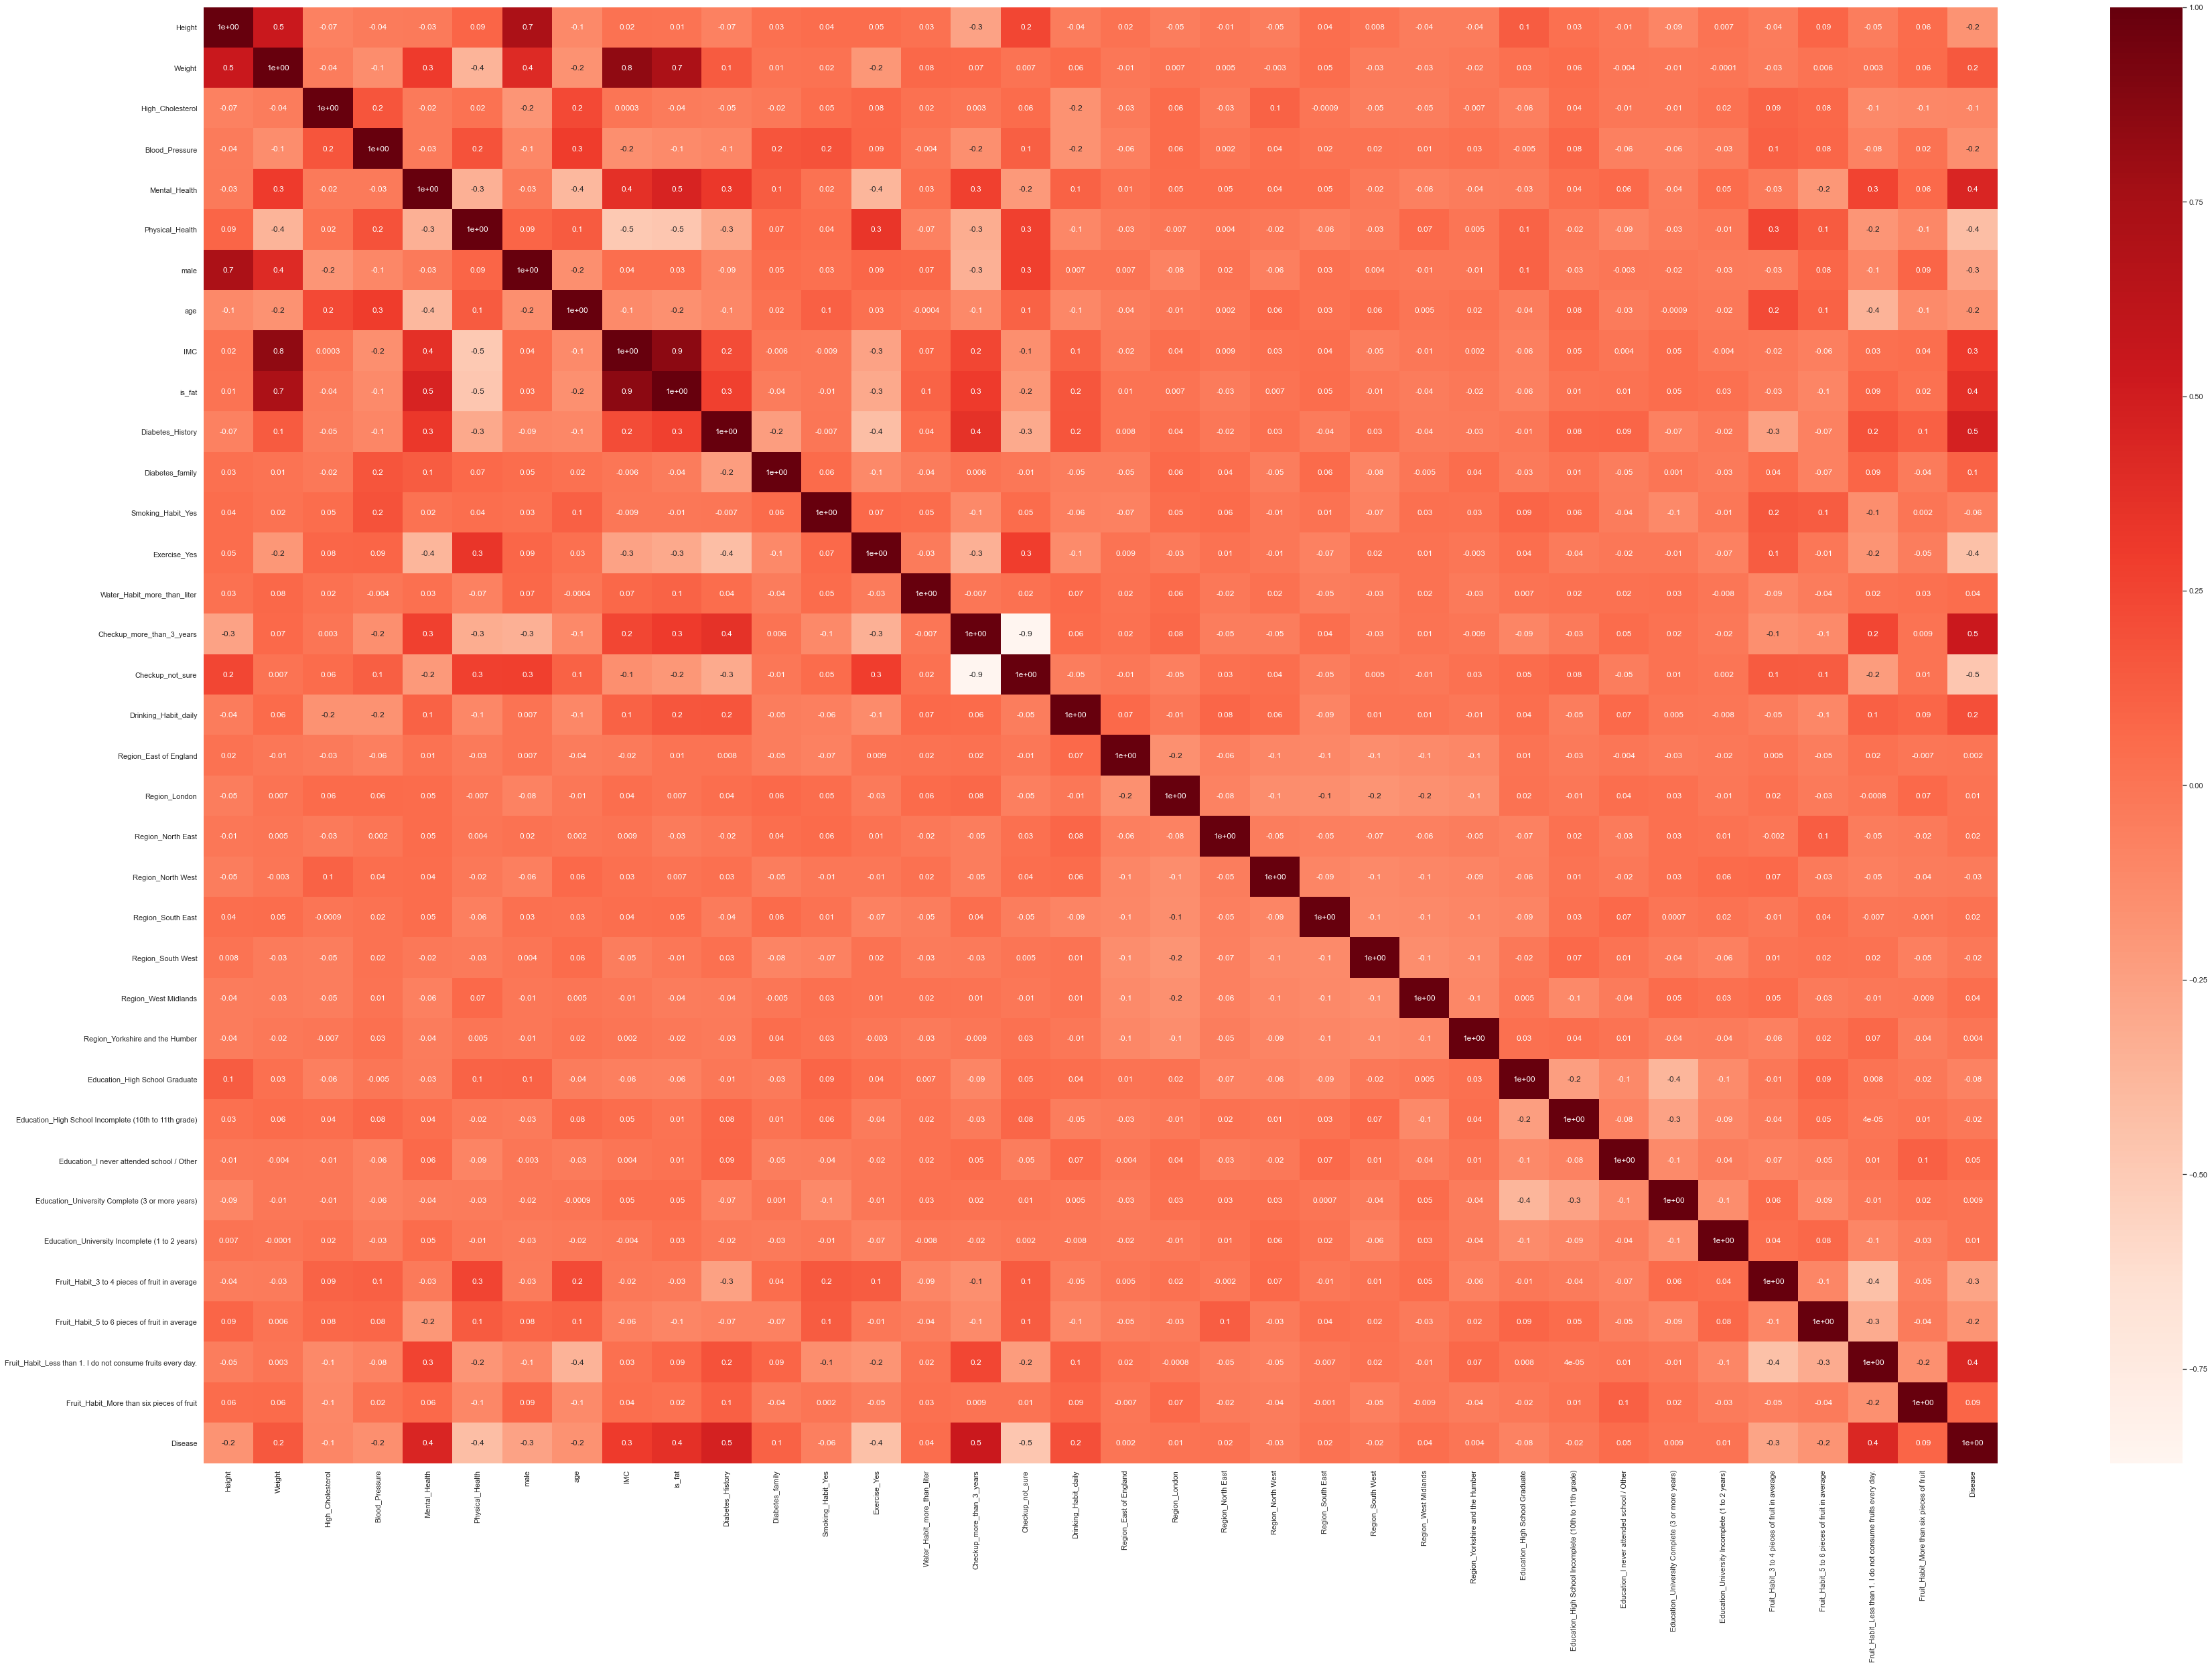

In [72]:
cor_pearson = x_train.join(y_train).corr()
cor_heatmap(cor_pearson)

### 7.4. Chi-square for Categorical Data

In [73]:
virus_cat = virus[['Disease', 'male', 'is_fat', 'Diabetes_History', 'Diabetes_family', 'Smoking_Habit_Yes',
       'Exercise_Yes', 'Water_Habit_more_than_liter',
       'Checkup_more_than_3_years', 'Checkup_not_sure', 'Drinking_Habit_daily',
       'Region_East of England', 'Region_London', 'Region_North East',
       'Region_North West', 'Region_South East', 'Region_South West',
       'Region_West Midlands', 'Region_Yorkshire and the Humber',
       'Education_High School Graduate',
       'Education_High School Incomplete (10th to 11th grade)',
       'Education_I never attended school / Other',
       'Education_University Complete (3 or more years)',
       'Education_University Incomplete (1 to 2 years)',
       'Fruit_Habit_3 to 4 pieces of fruit in average',
       'Fruit_Habit_5 to 6 pieces of fruit in average',
       'Fruit_Habit_Less than 1. I do not consume fruits every day.',
       'Fruit_Habit_More than six pieces of fruit']]

In [74]:
def TestIndependence(X,y,var,alpha=0.05):        
    dfObserved = pd.crosstab(y,X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result)

In [75]:
for var in x_train_cat:
    TestIndependence(x_train_cat[var],y_train, var, alpha = 0.01)

male is IMPORTANT for Prediction
is_fat is IMPORTANT for Prediction
Diabetes_History is IMPORTANT for Prediction
Diabetes_family is NOT an important predictor. (Discard Diabetes_family from model)
Smoking_Habit_Yes is NOT an important predictor. (Discard Smoking_Habit_Yes from model)
Exercise_Yes is IMPORTANT for Prediction
Water_Habit_more_than_liter is NOT an important predictor. (Discard Water_Habit_more_than_liter from model)
Checkup_more_than_3_years is IMPORTANT for Prediction
Checkup_not_sure is IMPORTANT for Prediction
Drinking_Habit_daily is IMPORTANT for Prediction
Region_East of England is NOT an important predictor. (Discard Region_East of England from model)
Region_London is NOT an important predictor. (Discard Region_London from model)
Region_North East is NOT an important predictor. (Discard Region_North East from model)
Region_North West is NOT an important predictor. (Discard Region_North West from model)
Region_South East is NOT an important predictor. (Discard Region

### 7.5. ANOVA

In [76]:
# Create a SelectKBest object to select features with best ANOVA F-Values
fvalue_selector = SelectKBest(f_classif)

# Apply the SelectKBest object to the features and target
X_kbest = fvalue_selector.fit_transform(x_train, y_train)

In [77]:
# Show results
print('Original number of features:', x_train.shape[1])
print('Reduced number of features:', X_kbest.shape[1])

Original number of features: 35
Reduced number of features: 10


In [78]:
# Get columns to keep and create new dataframe with those only
cols = fvalue_selector.get_support(indices=True)
features_to_keep = x_train.iloc[:,cols]
features_to_keep.columns

Index(['Mental_Health', 'Physical_Health', 'IMC', 'is_fat', 'Diabetes_History',
       'Exercise_Yes', 'Checkup_more_than_3_years', 'Checkup_not_sure',
       'Fruit_Habit_3 to 4 pieces of fruit in average',
       'Fruit_Habit_Less than 1. I do not consume fruits every day.'],
      dtype='object')

### 7.6. MIC

In [79]:
mutual = mutual_info_classif(x_train, y_train, discrete_features=True)

mic = dict(zip(x_train.columns, mutual))
mic = dict(sorted(mic.items(), key=lambda item: item[1]))
mic

{'Region_East of England': 1.3617691704825852e-06,
 'Region_Yorkshire and the Humber': 8.04697038961355e-06,
 'Education_University Complete (3 or more years)': 4.4878080096122375e-05,
 'Region_London': 5.536144988030345e-05,
 'Education_University Incomplete (1 to 2 years)': 5.7032517536748095e-05,
 'Region_South East': 0.00011989494069958306,
 'Region_South West': 0.00013396760829309518,
 'Region_North East': 0.0001373071163196099,
 'Education_High School Incomplete (10th to 11th grade)': 0.00014161422727368422,
 'Region_North West': 0.0006092159304481731,
 'Region_West Midlands': 0.0006307644846071936,
 'Water_Habit_more_than_liter': 0.0009236898244939229,
 'Education_I never attended school / Other': 0.001389296748491968,
 'Smoking_Habit_Yes': 0.001534393867527739,
 'Education_High School Graduate': 0.0030689431870050687,
 'Fruit_Habit_More than six pieces of fruit': 0.004025460360784654,
 'Diabetes_family': 0.005798499353017766,
 'Fruit_Habit_5 to 6 pieces of fruit in average': 0.

### Wrapper Methods

### 7.7. Recursive Feature Elimination (RFE)

In [ ]:
#no of features
nof_list=np.arange(1,x_train.shape[1])
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in nof_list:
    model = LogisticRegression()
    rfe = RFE(estimator = model,n_features_to_select= n)
    X_train_rfe = rfe.fit_transform(x_train,y_train)
    X_val_rfe = rfe.transform(x_val)
    model.fit(X_train_rfe,y_train)
    
    score = model.score(X_val_rfe,y_val)
    score_list.append(score)
    
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

In [ ]:
rfe = RFE(estimator = model, n_features_to_select = 28)
X_rfe = rfe.fit_transform(X = x_train, y = y_train)
selected_features = pd.Series(rfe.support_, index = x_train.columns)
selected_features

### 7.8. Forward Selection

In [ ]:
def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = smodels.OLS(target, smodels.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [ ]:
forward_selection(x_train,y_train)

### 7.9. Backward Selection

In [ ]:
def backward_selection(data, target,significance_level = 0.05):
    features = data.columns.tolist()
    while(len(features)>0):
        features_with_constant = smodels.add_constant(data[features])
        p_values = smodels.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break 
    return features

In [ ]:
backward_selection(x_train,y_train)

### 7.10. Stepwise Selection

In [ ]:
def stepwise_selection(data, target,SL_in=0.05,SL_out = 0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = smodels.OLS(target, smodels.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<SL_in):
            best_features.append(new_pval.idxmin())
            while(len(best_features)>0):
                best_features_with_constant = smodels.add_constant(data[best_features])
                p_values = smodels.OLS(target, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= SL_out):
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)
                else:
                    break 
        else:
            break
    return best_features

In [ ]:
stepwise_selection(x_train,y_train)

### Embedded Methos

### 7.11. Lasso Regression

In [ ]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

In [ ]:
reg = LassoCV()
reg.fit(x_train, y_train)
coef = pd.Series(reg.coef_, index=x_train.columns)
coef.sort_values()

In [ ]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

In [ ]:
plot_importance(coef,'Lasso')

### 7.12. Ridge Regression

In [ ]:
ridge = RidgeCV()
ridge.fit(x_train, y_train)
coef_ridge = pd.Series(ridge.coef_, index=x_train.columns)
print(coef_ridge.sort_values())

In [ ]:
plot_importance(coef_ridge, 'Ridge')

### 7.13. Decision Tree - Feature Importance 

In [ ]:
gini_importance = DecisionTreeClassifier().fit(x_train, y_train).feature_importances_
entropy_importance = DecisionTreeClassifier(criterion='entropy').fit(x_train, y_train).feature_importances_

In [ ]:
zippy = pd.DataFrame(zip(gini_importance, entropy_importance), columns = ['gini','entropy'])
zippy['col'] = x_train.columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(15,8))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)

### 7.15. Dimensionality Reduction

#### 7.15.1. PCA

In [ ]:
X_train_pca = x_train.copy()

pca = PCA()
#teste = pca.fit(X_train_pca)
pca_feat = pca.fit_transform(X_train_pca)
pca_feat

# Output PCA table
pd.DataFrame(
    {"Eigenvalue": pca.explained_variance_,
     "Difference": np.insert(np.diff(pca.explained_variance_), 0, 0),
     "Proportion": pca.explained_variance_ratio_,
     "Cumulative": np.cumsum(pca.explained_variance_ratio_)},
    index=range(1, pca.n_components_ + 1)
)

In [ ]:
# figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# draw plots
ax1.plot(pca.explained_variance_, marker=".", markersize=12)
ax2.plot(pca.explained_variance_ratio_, marker=".", markersize=12, label="Proportion")
ax2.plot(np.cumsum(pca.explained_variance_ratio_), marker=".", markersize=12, linestyle="--", label="Cumulative")

# customizations
ax2.legend()
ax1.set_title("Scree Plot", fontsize=14)
ax2.set_title("Variance Explained", fontsize=14)
ax1.set_ylabel("Eigenvalue")
ax2.set_ylabel("Proportion")
ax1.set_xlabel("Components")
ax2.set_xlabel("Components")
ax1.set_xticks(range(0, pca.n_components_, 2))
ax1.set_xticklabels(range(1, pca.n_components_ + 1, 2))
ax2.set_xticks(range(0, pca.n_components_, 2))
ax2.set_xticklabels(range(1, pca.n_components_ + 1, 2))

plt.show()

In [ ]:
# Perform PCA again with the number of principal components you want to retain
pca = PCA(n_components = 10)
teste = pca.fit(X_train_pca)
pca_feat = pca.fit_transform(X_train_pca)
pca_feat_names = [f"PC{i}" for i in range(pca.n_components_)]
pca_df = pd.DataFrame(pca_feat, index = X_train_pca.index, columns = pca_feat_names)  # remember index=df_pca.index
pca_df

In [ ]:
# # Reassigning df to contain pca variables
# X_train_num_scaled = pd.concat([X_train_pca, pca_df], axis=1)
# X_train_num_scaled.head()

### 7.16 Final Insights of Feature Selection

#### Numerical Data

In [ ]:
# FS_num_matrix = pd.read_excel('the-smith-parasite-data/FS_num_matrix.xlsx')
# FS_num_matrix = pd.DataFrame(FS_num_matrix)

# FS_num_matrix

#### Categorical Data

In [ ]:
# FS_cat_matrix = pd.read_excel('the-smith-parasite-data/FS_cat_matrix.xlsx')
# FS_cat_matrix = pd.DataFrame(FS_cat_matrix)

# FS_cat_matrix

In [ ]:
# def features_to_keep():
#     fs_list = list()
#     for index,value in enumerate(FS_num_matrix['Use in the model?']):
#         if value == True:
#             fs_list.append(FS_num_matrix['Predictors'][index])
            
#     for index,value in enumerate(FS_cat_matrix['Use in the model?']):
#         if value == True:
#             fs_list.append(FS_cat_matrix['Predictors'][index])
        
#     return fs_list

In [ ]:
fs_keep = ['High_Cholesterol',
'Blood_Pressure',
 'Mental_Health',
 'Physical_Health',
 'age',
 'IMC',
 'male',
 'Diabetes_History',
 'Exercise_Yes',
 'Checkup_more_than_3_years',
 'Checkup_not_sure',
 'Drinking_Habit_daily',
 'Fruit_Habit_3 to 4 pieces of fruit in average',
 'Fruit_Habit_5 to 6 pieces of fruit in average',
 'Fruit_Habit_Less than 1. I do not consume fruits every day.']

# 8.  Random Search and Grid Search 


In [ ]:
# estimators = [('bg', RandomForestClassifier(n_estimators = 200, min_samples_split = 2, min_samples_leaf = 1, max_features = 'sqrt', max_depth = 110, bootstrap = False)),
#               ('sv', SVC(C=50, kernel='rbf')),
#               ('n', MLPClassifier(activation = 'relu', alpha = 0.0001, hidden_layer_sizes = (10, 30, 10), learning_rate = 'constant', solver = 'adam'),)
#               ]
# model_list=[
#             DecisionTreeClassifier(),
#             LogisticRegression(), 
#             MLPClassifier(),
#             GaussianNB(), 
#             GradientBoostingClassifier(), 
#             RandomForestClassifier(),
#             AdaBoostClassifier(base_estimator= RandomForestClassifier(n_estimators = 200, min_samples_split = 2, min_samples_leaf = 1, max_features = 'sqrt', max_depth = 110, bootstrap = False)),
#             BaggingClassifier(base_estimator= RandomForestClassifier(n_estimators = 200, min_samples_split = 2, min_samples_leaf = 1, max_features = 'sqrt', max_depth = 110, bootstrap = False)), 
#             StackingClassifier(estimators=estimators, final_estimator= RandomForestClassifier()),
#             SVC(),
#             LinearDiscriminantAnalysis(),
#             QuadraticDiscriminantAnalysis(),
#             NearestCentroid(metric='euclidean'),
#             VotingClassifier(estimators=estimators),
#             PassiveAggressiveClassifier()
#            ]


In [ ]:
# parameter_space_list = { #DecisionTree - 0
#     'max_depth': [2,3,4,5,6],
#     'criterion': ['gini', 'entropy'],
#     'splitter': ['random', 'best'],
#     'max_features': [2,4,6,8, None],
#     'max_leaf_nodes': [4,8,12, None]
# },{#Logistic Regression - 1
#     'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
#     'penalty': ['none', 'l1', 'l2', 'elasticnet'],
#     'C': [100, 10, 1.0, 0.1, 0.01]
# },{# MLPClassifier - 2
#     'hidden_layer_sizes': [(10,30,10),(20,)],
#     'activation': ['tanh', 'relu'],
#     'solver': ['sgd', 'adam'],
#     'alpha': [0.0001, 0.05],
#     'learning_rate': ['constant','adaptive']
# },{#GaussianNB - 3
#     'var_smoothing': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]
# },{#GradientBoostingClassifier - 4
#     "n_estimators":[5,50,250,500],
#     "max_depth":[1,3,5,7,9],
#     "learning_rate":[0.01,0.1,1,10,100]
# },{#RandomForestClassifier - 5
#     'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
#     'max_features': ['auto', 'sqrt'],
#     'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'bootstrap': [True, False]
# },{ #Adaboost with randomforest - 6
#     'n_estimators': [20,30,50,100,150],
#     'learning_rate': [0.001, 0.01, 0.1, 0.3, 0.5, 0.8, 1.0],
# },{#Bagging with Random forest - 7
#     'n_estimators': [2,5,10,20,30,50,100,150],
#     'max_samples': [0.1,0.2,0.4,0.6,0.8,1.0],
#     'max_features': [0.1,0.2,0.4,0.6,0.8,1.0],
#     'bootstrap': [True,False],
 
# },{# SVM - 8
#     'C': [0.5,1,10,20,50,80,100],
#     'kernel': ['poly', 'linear','sigmoid','rbf'],
# }






## RANDOM SEARCH

In [ ]:
# def random_search_evaluation(model, parameters,x_train,y_train):

#     random_search = RandomizedSearchCV(estimator = model, param_distributions = parameters, n_iter = 100, cv = 3, verbose=2,random_state=42, n_jobs = -1)

#     random_search.fit(x_train, y_train)

#     return print('The best param for ',model,'are: \n',random_search.best_params_)

In [ ]:
# for i,model in enumerate(model_list):
# #    print(i)
#    random_search_evaluation(model, parameter_space_list1[i], x, y)

### Random Search Results

The best param for  DecisionTreeClassifier() are:
{'splitter': 'random', 'max_leaf_nodes': None, 'max_features': 6, 'max_depth': 6, 'criterion': 'entropy'}

The best param for  LogisticRegression() are: 
 {'solver': 'saga', 'penalty': 'l2', 'C': 100}

The best param for  MLPClassifier() are: 
 {'solver': 'adam', 'learning_rate': 'constant', 'hidden_layer_sizes': (10, 30, 10), 'alpha': 0.0001, 'activation': 'relu'}

The best param for  GaussianNB() are: 
 {'var_smoothing': 0.01}

The best param for  GradientBoostingClassifier() are: 
 {'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.1}

The best param for  RandomForestClassifier() are: 
 {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 110, 'bootstrap': False}

The best param for  AdamBoostClassifier() are:
 {'n_estimators':100, 'learning_rate': 0.8}

The best param for  BaggingClassifier() are:
 {'n_estimators':100, 'max_samples': 0.8,'max_features':0.5,'bootstrap': True}

 The best param for  SVC() are: 
 {'kernel': 'rbf', 'C': 50}



## GRID SEARCH: 


In [ ]:
# parameter_space_list_grid = { #DecisionTree - 0
#     'max_depth': [5,6,7],
#     'criterion': ['entropy'],
#     'splitter': ['random'],
#     'max_features': [5,6,8],
#     'max_leaf_nodes': [1,2, None]
# },{#Logistic Regression - 1
#     'solver': ['saga'],
#     'penalty': ['l1', 'l2','elasticnet'],
#     'C': [50,100,150]
# },{# MLPClassifier - 2
#     'hidden_layer_sizes': [(10,30,10)],
#     'activation': ['relu'],
#     'solver': ['adam'],
#     'alpha': [0.0001, 0.05],
#     'learning_rate': ['constant','adaptive']
# },{#GaussianNB - 3
#     'var_smoothing': [1e-1,1e-2, 1e-3]
# },{#GradientBoostingClassifier - 4
#     "n_estimators":[400,500,600],
#     "max_depth":[4,5,6],
#     "learning_rate":[0.01,0.1]
# },{#RandomForestClassifier - 5
#     'n_estimators': [150,200,250],
#     'max_features': ['sqrt'],
#     'max_depth': [80,110,150],
#     'min_samples_split': [2],
#     'min_samples_leaf': [1, 2],
#     'bootstrap': [False]
# }{ #Adaboost with randomforest - 6
#     'n_estimators': [50,100],
#     'learning_rate': [0.5, 0.8, 1.0],
# },{#Bagging with Random forest - 7
#     'n_estimators': [50,100],
#     'max_samples': [0.6,0.8,1.0],
#     'max_features': [0.6,0.8,1.0],
#     'bootstrap': [True,False],
 
# },{# SVM - 8
#     'C': [,20,50,80],
#     'kernel': ['poly', 'linear','sigmoid','rbf'],
# }

In [ ]:
# def grid_search_evaluation(model, parameters,x_train,y_train):

#     grid_search = GridSearchCV(estimator = model, param_grid = parameters, cv = 3, n_jobs = -1, verbose = 2)
#     grid_search.fit(x_train, y_train)

#     return print('The best param for ',model,'are: \n',grid_search.best_params_)

In [ ]:
# for i,model in enumerate(model_list):
#     print(i)
#     grid_search_evaluation(model, parameter_space_list_grid[i], x, y)

### Grid Search results

The best param for  DecisionTreeClassifier() are: 
 {'criterion': 'entropy', 'max_depth': 6, 'max_features': 8, 'max_leaf_nodes': None, 'splitter': 'random'}

The best param for  LogisticRegression() are: 
 {'C': 50, 'penalty': 'l1', 'solver': 'saga'}

The best param for  MLPClassifier() are: 
 {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'constant', 'solver': 'adam'}

The best param for  GaussianNB() are: 
 {'var_smoothing': 0.01}

The best param for  GradientBoostingClassifier() are: 
 {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500}

The best param for  RandomForestClassifier() are: 
 {'bootstrap': False, 'max_depth': 110, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 250}

 The best param for  AdamBoostClassifier() are:
 {'n_estimators':100, 'learning_rate': 0.8}

The best param for  BaggingClassifier() are:
 {'n_estimators':100, 'max_samples': 0.8,'max_features':0.5,'bootstrap': True}

 The best param for  SVC() are: 
 {'kernel': 'rbf', 'C': 50}



# 9. Modelling

In [ ]:
x = virus[fs_keep]

y = virus["Disease"]

## Cross Validation

In [ ]:
estimators = [('rf', RandomForestClassifier(n_estimators = 200, min_samples_split = 2, min_samples_leaf = 1, max_features = 'sqrt', max_depth = 110, bootstrap = False)),
              ('sv', SVC(C=50, kernel='rbf')),
              ('n', MLPClassifier(activation = 'relu', alpha = 0.0001, hidden_layer_sizes = (10, 30, 10), learning_rate = 'constant', solver = 'adam'),)
              ]

model_list=[
            DecisionTreeClassifier(), # no params because better score
            LogisticRegression(C = 50, penalty = 'l1', solver = 'saga'), 
            MLPClassifier(activation = 'relu', alpha = 0.0001, hidden_layer_sizes = (10, 30, 10), learning_rate = 'constant', solver = 'adam'),
            GaussianNB(var_smoothing = 0.01), 
            GradientBoostingClassifier(learning_rate = 0.1, max_depth = 5, n_estimators = 500), 
            RandomForestClassifier(n_estimators = 200, min_samples_split = 2, min_samples_leaf = 1, max_features = 'sqrt', max_depth = 110, bootstrap = False),
            AdaBoostClassifier( base_estimator = RandomForestClassifier(n_estimators = 200, min_samples_split = 2, min_samples_leaf = 1, max_features = 'sqrt', max_depth = 110, bootstrap = False),n_estimators= 100,learning_rate= 0.8),
            BaggingClassifier(base_estimator= RandomForestClassifier(n_estimators = 200, min_samples_split = 2, min_samples_leaf = 1, max_features = 'sqrt', max_depth = 110, bootstrap = False),n_estimators= 100, max_samples = 0.8, max_features=0.5,bootstrap=True),
            SVC(C=50, kernel='rbf'),
            StackingClassifier(estimators=estimators, final_estimator= RandomForestClassifier()),
            KNeighborsClassifier(n_neighbors=146 , p=1),
            LinearDiscriminantAnalysis(solver='lsqr'),
            QuadraticDiscriminantAnalysis(),
            NearestCentroid(metric='euclidean'),
            VotingClassifier(estimators=estimators, voting='hard'),
            PassiveAggressiveClassifier(C= 0.001, fit_intercept= True, loss='squared_hinge', random_state=42, tol= 0.001)
           ]

### Kfold (warning: takes long time to run)

In [ ]:
# kf = KFold(n_splits=10) # 10 pq está escrito nos slides que é o melhor
# scores = [[], [], []]

# def avg_score_model(split_method,X,y,model):
#     score_train = []
#     score_test = []
#     for train_index, test_index in split_method.split(X):
#         X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#         y_train, y_test = y.iloc[train_index], y.iloc[test_index]
#         model = model.fit(X_train, y_train)
#         value_train = f1_score(model.predict(X_train),y_train)
#         value_test = f1_score(model.predict(X_test),y_test)
#         score_train.append(round(value_train, 4))
#         score_test.append(round(value_test,4))
    
#     print("----------------------------------------")
#     print(f"{model}")
    
#     print('Training mean accuracy for each model:', score_train)
#     print('\nTest mean accuracy for each model:', score_test)
#     print('\nTrain average value:' +  str(round(np.mean(score_train),2)) + '+/-' + str(round(np.std(score_train),2)))
#     print('\nTest average value:' +  str(round(np.mean(score_test),2)) + '+/-' + str(round(np.std(score_test),2)))
#     scores[0].append(str(model))
#     scores[1].append(str(round(np.mean(score_train),2)))
#     scores[2].append(str(round(np.mean(score_test),2)))

# for model in model_list:
#     avg_score_model(kf, x, y, model)

In [ ]:
# for model in model_list:
#     print(model)
#     predicted = cross_val_predict(model, x, y, cv=kf)
#     print(classification_report(y, predicted))

In [ ]:
# scores_final = pd.DataFrame()
# scores_final["Model Name"] = scores[0]
# scores_final["Train"] = scores[1]
# scores_final["Validation"] = scores[2]

In [ ]:
# scores_final.sort_values(by = "Validation", ascending= False)

## Final Model

In [ ]:
model = RandomForestClassifier(n_estimators = 200, min_samples_split = 2, min_samples_leaf = 1, max_features = 'sqrt', max_depth = 110, bootstrap = False).fit(x,y)

# 10. Deploy

In [ ]:
# Imports
test_demo = pd.read_excel("the-smith-parasite-data/test_demo.xlsx")
test_habit = pd.read_excel("the-smith-parasite-data/test_habits.xlsx")
test_health = pd.read_excel("the-smith-parasite-data/test_health.xlsx")

# merge all dataframes into 1
test = test_health.merge(test_demo).merge(test_habit)

#set index to patient ID 
test.set_index('PatientID', inplace = True)

In [ ]:
test.isna().sum()

## 1.1. Transform and Create new variables

In [ ]:
#create male feature from name, delete name because its useless
test["male"] = [1 if x[:3] == "Mr." else 0 for x in test.Name]
test.drop(labels = {"Name"}, inplace = True, axis = 1)

In [ ]:
#turn year into age
test["age"] = [2022 - row for row in test.Birth_Year]
test.drop(labels = {"Birth_Year"}, inplace = True, axis = 1)

In [ ]:
test['IMC'] = test['Weight']/(test['Height']/100)**2 

In [ ]:
test["is_fat"] = [1 if x>25 else 0 for x in test.IMC] # ver vizualização bins

In [ ]:
diab = []
diabF = []
for i,x in enumerate(test.Diabetes):
    if x == 'Neither I nor my immediate family have diabetes.':
        diab.append(0)
        diabF.append(0)
    elif x=='I have/had pregnancy diabetes or borderline diabetes':
        diab.append(1)
        diabF.append(0) 
    elif x=='I do have diabetes':
        diab.append(1)
        diabF.append(0)
    else:
        diab.append(0)
        diabF.append(1)
        
test['Diabetes_History'] = diab
test['Diabetes_family'] = diabF
test.drop(labels = {"Diabetes"}, inplace = True, axis = 1)

In [ ]:
#Turn drink into a more readable column in analysis
drink_dict = {"I usually consume alcohol every day": "daily", 
           "I consider myself a social drinker" : "social", 
           "I do not consume any type of alcohol": "no"}

test["Drinking_Habit"] = [drink_dict[key] for key in test.Drinking_Habit]

In [ ]:
test['Region'] = test['Region'].replace('LONDON','London')

In [ ]:
test_num = test.select_dtypes(include=np.number).set_index(test.index)

## 4.6. Category Aggregation

In [ ]:
test["Checkup"]= test['Checkup'].replace(['Less than 3 years but more than 1 year','Less than three months'],'Less than 3 years')

In [ ]:
test["Water_Habit"]= test['Water_Habit'].replace('Between one liter and two liters','More than a liter')
test["Water_Habit"]= test['Water_Habit'].replace(['More than half a liter but less than one liter','Less than half a liter'],'Less than a liter')

In [ ]:
test["Drinking_Habit"]= test['Drinking_Habit'].replace(['social','no'],'I do not consume alcohol')

### 4.7. Categorical to Numerical 

In [ ]:
# turn smoking and exercise into a dummy variable
dummies = test[["Smoking_Habit", "Exercise", "Water_Habit", "Checkup", "Drinking_Habit"]]
dummies = pd.get_dummies(dummies, drop_first = True)
test[dummies.columns] = dummies
test.drop(labels = {"Smoking_Habit", "Exercise", "Water_Habit", "Checkup", "Drinking_Habit"}, inplace = True, axis = 1)

In [ ]:
test.rename(columns = {"Water_Habit_More than a liter": "Water_Habit_more_than_liter", "Checkup_More than 3 years": "Checkup_more_than_3_years", "Checkup_Not sure": "Checkup_not_sure"}, inplace=True)

## target mean

In [ ]:
#test_cat = test.select_dtypes(exclude = np.number).set_index(test.index)

#for col in test_cat.columns:
#    ordercont = test_aux.groupby(col)['Disease'].mean().to_dict()
#    test_cat[col] = test_cat[col].map(ordercont)

In [ ]:
#test[["Region", "Education", "Fruit_Habit"]] = test_cat

In [ ]:
test = pd.get_dummies(test, drop_first=True)

In [ ]:
num_vars = ['Height', 'Weight', 'High_Cholesterol','Blood_Pressure','Mental_Health', 'Physical_Health', 'age', 'IMC']

In [ ]:
test_temp = standardize(test, method = StandardScaler())
test[num_vars] = test_temp

In [ ]:
test = test[fs_keep]

In [ ]:
pred = model.predict(test)

In [ ]:
answer = pd.DataFrame([test.index.T, pred]).T
answer.columns = ['PatientID','Disease']
#answer.to_csv("Submissões/Group44_Version16.csv", index = None)

In [ ]:
print("hello")

In [ ]:
answer.head()